In [7]:
import os
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib

In [8]:
train_path = '../data/hy_round2_train_20200225'

In [9]:
train_files = os.listdir(train_path)
len(train_files)

8166

In [4]:
ret = []
for file in tqdm(train_files):
    df = pd.read_csv(f'{train_path}/{file}')
    df.columns = ['ship','lat','lon','v','d','time','type']
    df['lat_lat_mean'] = abs(df['lat'] - df['lat'].mean())
    df['lon_lon_mean'] = abs(df['lon'] - df['lon'].mean())
    df['distance'] = abs(df['lat']) + abs(df['lon'])
    ret.append(df)
df = pd.concat(ret)


100%|██████████| 8166/8166 [00:53<00:00, 152.22it/s]


In [9]:
df.head()

,ship,lat,lon,v,d,time,type,lat_lat_mean,lon_lon_mean,distance
0,27633,23.597,117.428,0.05,0,1018 23:59:41,拖网,0.000036,0.000501,141.025
1,27633,23.597,117.428,0.00,0,1018 23:49:41,拖网,0.000036,0.000501,141.025
2,27633,23.597,117.428,0.00,0,1018 23:39:41,拖网,0.000036,0.000501,141.025
3,27633,23.597,117.428,0.05,0,1018 23:29:41,拖网,0.000036,0.000501,141.025
4,27633,23.597,117.428,0.00,0,1018 23:19:42,拖网,0.000036,0.000501,141.025


In [10]:
df.tail()

,ship,lat,lon,v,d,time,type,lat_lat_mean,lon_lon_mean,distance
670,20145,23.841,118.339,9.12,352,0902 00:49:02,拖网,0.371452,0.109439,142.180
671,20145,23.818,118.350,8.90,331,0902 00:39:00,拖网,0.348452,0.098439,142.168
672,20145,23.793,118.359,9.61,334,0902 00:28:49,拖网,0.323452,0.089439,142.152
673,20145,23.768,118.370,9.71,330,0902 00:18:51,拖网,0.298452,0.078439,142.138
674,20145,23.744,118.381,10.09,341,0902 00:08:52,拖网,0.274452,0.067439,142.125


In [11]:
train_wei = df[df['type'] == '围网']
train_tuo = df[df['type'] == '拖网']
train_ci = df[df['type'] == '刺网']

In [12]:
train_wei.describe()

,ship,lat,lon,v,d,lat_lat_mean,lon_lon_mean,distance
count,2.131985e+06,2.131985e+06,2.131985e+06,2.131985e+06,2.131985e+06,2.131985e+06,2.131985e+06,2.131985e+06
mean,2.407338e+04,2.626654e+01,1.203658e+02,2.061048e+00,1.231610e+02,2.181730e-01,3.160295e-01,1.466324e+02
std,2.376883e+03,2.558641e+00,2.747484e+00,2.823856e+00,1.179164e+02,3.148257e-01,5.028888e-01,5.109049e+00
min,2.000100e+04,1.566900e+01,1.030570e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.256480e+02
25%,2.197200e+04,2.516000e+01,1.192650e+02,1.100000e-01,0.000000e+00,1.724484e-02,2.272180e-02,1.444420e+02
50%,2.404800e+04,2.629400e+01,1.202440e+02,3.800000e-01,9.700000e+01,1.016000e-01,1.309909e-01,1.464530e+02
75%,2.616000e+04,2.736800e+01,1.217130e+02,3.290000e+00,2.220000e+02,2.955937e-01,3.838737e-01,1.494830e+02
max,2.816500e+04,4.484200e+01,1.278030e+02,9.196000e+01,3.600000e+02,1.485167e+01,1.968287e+01,1.622610e+02


In [13]:
train_tuo.describe()

,ship,lat,lon,v,d,lat_lat_mean,lon_lon_mean,distance
count,1.943145e+06,1.943145e+06,1.943145e+06,1.943145e+06,1.943145e+06,1.943145e+06,1.943145e+06,1.943145e+06
mean,2.406009e+04,2.398013e+01,1.183773e+02,2.761558e+00,1.357153e+02,2.074882e-01,2.656615e-01,1.423574e+02
std,2.347415e+03,1.522259e+00,1.802042e+00,2.516888e+00,1.129562e+02,2.893883e-01,3.735316e-01,3.207793e+00
min,2.000000e+04,6.913000e+00,1.056410e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.146690e+02
25%,2.203100e+04,2.318900e+01,1.175170e+02,2.200000e-01,2.000000e+01,3.411257e-02,4.230600e-02,1.409420e+02
50%,2.400500e+04,2.375100e+01,1.183020e+02,2.970000e+00,1.100000e+02,1.123589e-01,1.438358e-01,1.420470e+02
75%,2.608400e+04,2.477500e+01,1.189480e+02,4.050000e+00,2.390000e+02,2.559071e-01,3.367278e-01,1.435490e+02
max,2.816300e+04,3.786400e+01,1.275710e+02,9.423000e+01,3.600000e+02,2.111169e+01,1.461512e+01,1.590100e+02


In [14]:
train_ci.describe()

,ship,lat,lon,v,d,lat_lat_mean,lon_lon_mean,distance
count,814211.000000,814211.000000,814211.000000,814211.000000,814211.000000,814211.000000,814211.000000,814211.000000
mean,24179.551352,25.157728,118.571845,1.153828,114.942156,0.103700,0.217580,143.729573
std,2342.031940,2.455178,6.963708,2.191807,120.526331,0.583683,2.620219,8.943606
min,20002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22194.000000,24.044000,117.957000,0.110000,0.000000,0.000093,0.000111,142.127000
50%,24263.000000,24.521000,118.566000,0.220000,81.000000,0.011523,0.012713,143.086000
75%,26199.000000,26.045000,119.942000,0.810000,217.000000,0.087129,0.127961,145.827000
max,28164.000000,34.326000,126.132000,90.830000,360.000000,22.602876,109.754735,158.139000


(array([5.41241673e+00, 3.57831033e+00, 2.27015738e+00, 1.71535823e+00,
        1.22329849e+00, 7.98545407e-01, 5.40135921e-01, 5.38453255e-01,
        4.53118029e-01, 4.98550022e-01, 3.08408717e-01, 2.77399578e-01,
        2.77639959e-01, 1.99275780e-01, 2.11775588e-01, 1.75478070e-01,
        8.22102737e-02, 2.10573683e-01, 5.81721820e-02, 8.05276073e-02,
        1.45911217e-01, 9.90369379e-02, 2.00237304e-01, 3.24514238e-02,
        2.16342825e-02, 1.61055215e-02, 9.66331287e-02, 1.00959985e-02,
        2.49996154e-02, 1.17786649e-02, 2.81245673e-02, 1.54805311e-01,
        2.95668528e-02, 3.72590422e-02, 2.95668528e-02, 1.06007984e-01,
        4.30281842e-02, 3.87013277e-02, 1.85093306e-02, 3.53359948e-02,
        2.83649482e-02, 8.17295119e-03, 1.51439978e-02, 5.52876110e-02,
        1.58651405e-02, 1.15382840e-02, 3.02879956e-02, 2.95668528e-02,
        6.97104660e-03, 7.21142752e-03, 2.42784726e-02, 9.61523669e-03,
        1.44228550e-02, 1.54564930e-01, 2.40380917e-03, 1.923047

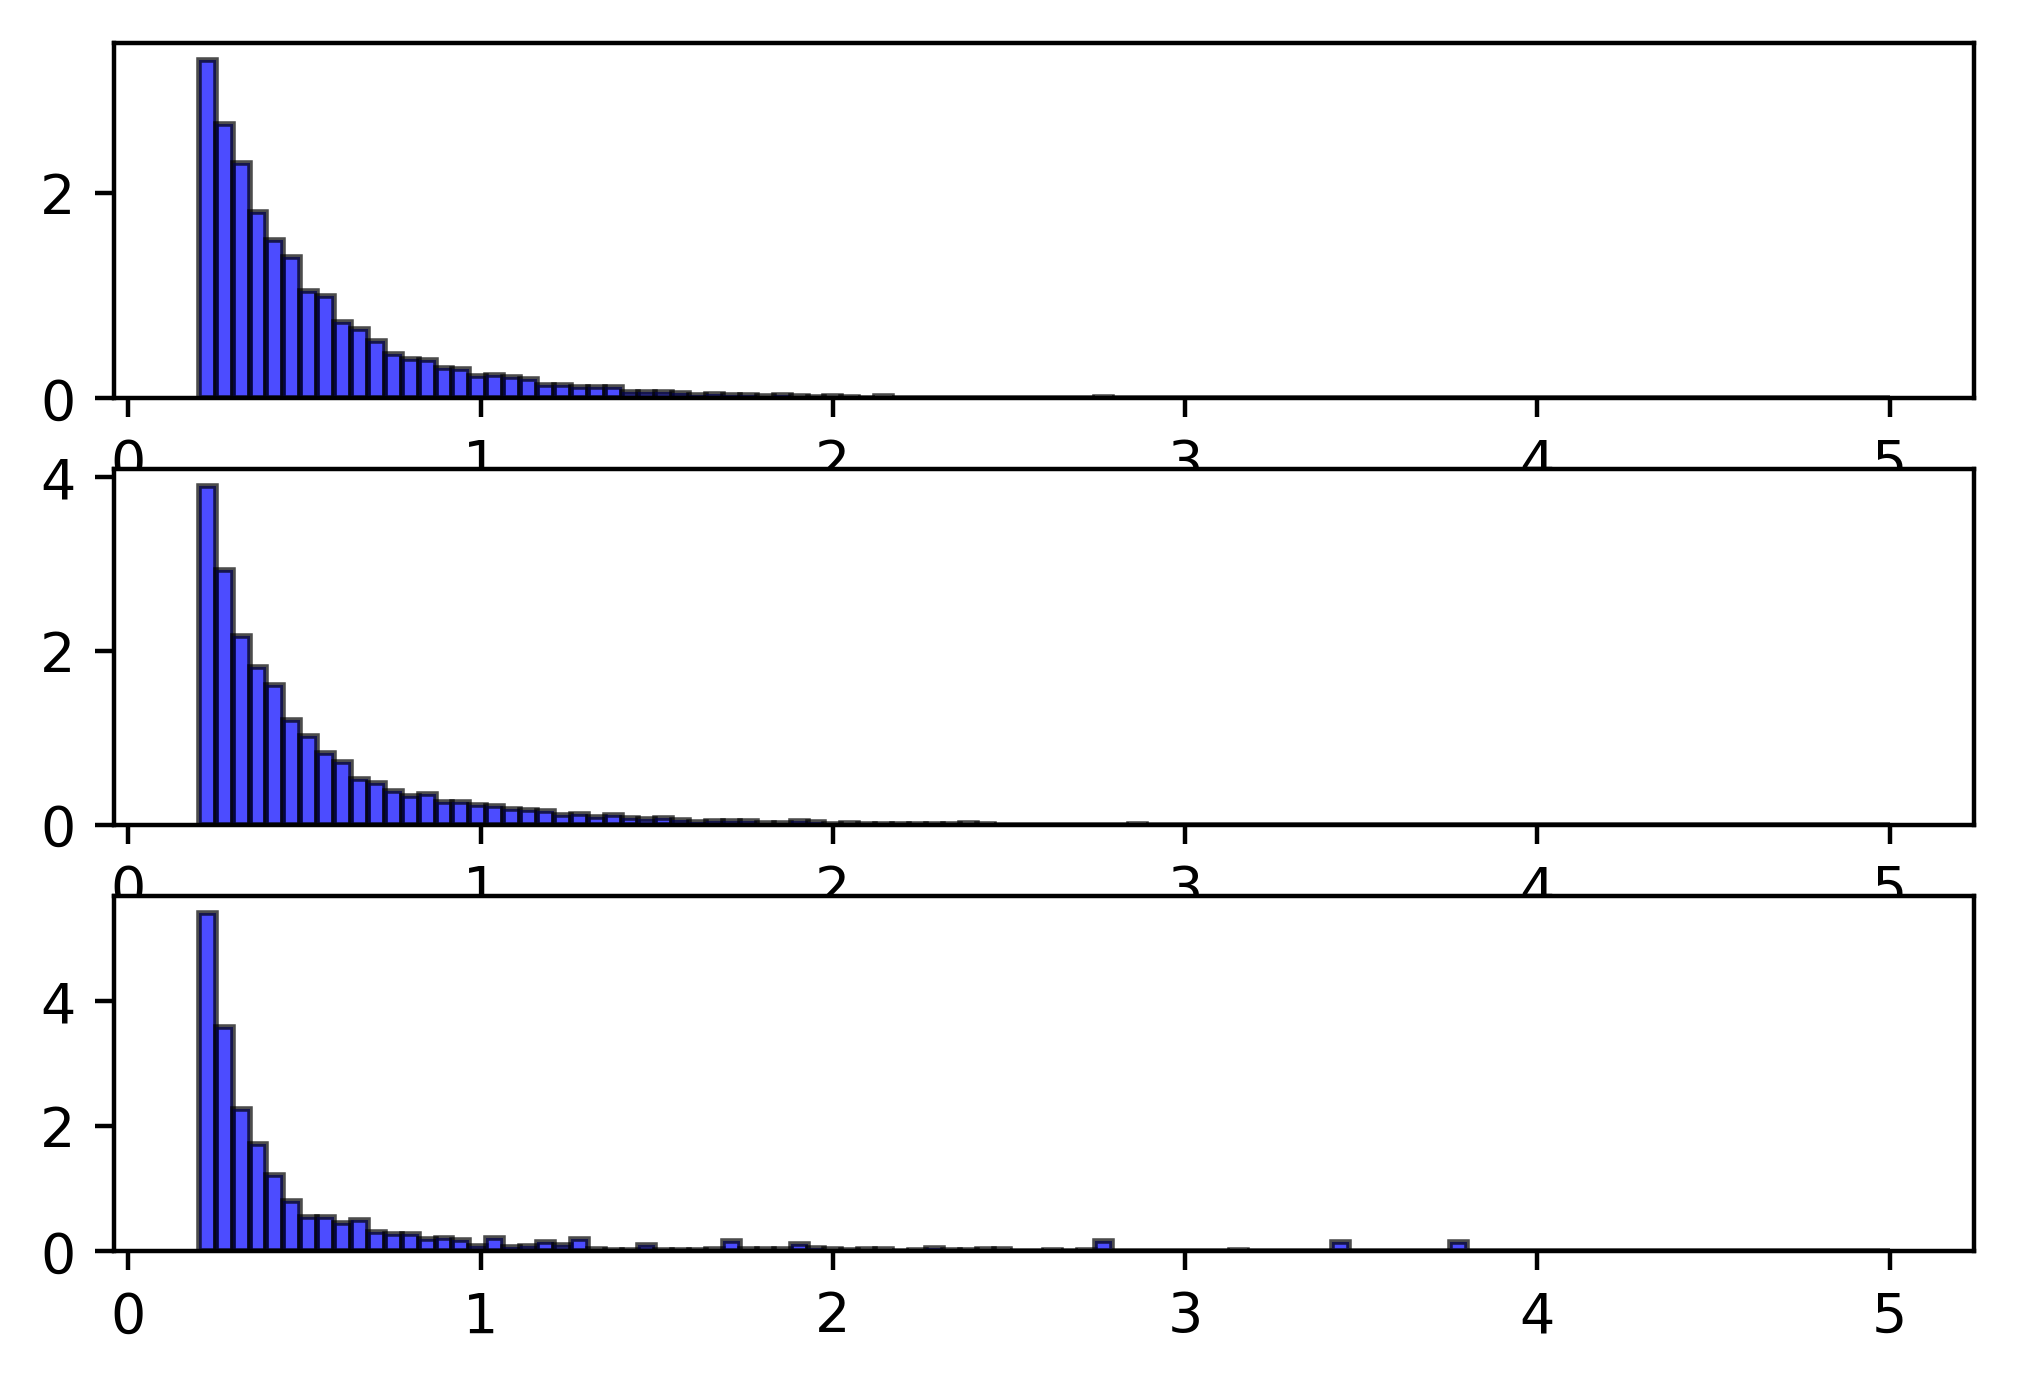

In [24]:
fig = plt.figure(dpi=400)
ax = fig.add_subplot(3,1,1)
ax.hist(train_wei['lat_lat_mean'], bins=100, range=(0.2,5),normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
bx = fig.add_subplot(3,1,2)
bx.hist(train_tuo['lat_lat_mean'], bins=100,range=(0.2,5),normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
cx = fig.add_subplot(3,1,3)
cx.hist(train_ci['lat_lat_mean'], bins=100, range=(0.2,5),normed=1, facecolor="blue", edgecolor="black", alpha=0.7)

(array([1.24327992e+01, 1.76314189e+00, 1.45257545e+00, 9.93511565e-01,
        7.11741489e-01, 5.38642524e-01, 4.80827717e-01, 3.58757784e-01,
        2.86236350e-01, 2.17786381e-01, 1.17085472e-01, 1.21724475e-01,
        8.15280086e-02, 6.03563889e-02, 4.41198787e-02, 3.97769824e-02,
        6.58590360e-02, 2.87716883e-02, 2.46015208e-02, 3.42743353e-02,
        1.39910354e-02, 2.87963638e-02, 1.82599051e-02, 5.99615802e-03,
        3.23249671e-03, 3.15847007e-03, 3.28184780e-03, 4.54030072e-03,
        4.14549196e-03, 7.22993539e-03, 9.62346348e-04, 1.13507518e-03,
        9.62346348e-04, 1.08572409e-03, 1.82599051e-03, 2.73898576e-03,
        3.99743868e-03, 9.82086786e-03, 4.66367846e-03, 4.44159853e-03,
        1.01169744e-03, 6.66239780e-04, 5.18186495e-04, 4.68835401e-04,
        1.28312846e-03, 2.64028357e-03, 2.56625693e-03, 3.20782116e-04,
        2.22079927e-04, 1.48053284e-04, 2.46755474e-04, 2.46755474e-04,
        1.97404379e-04, 1.48053284e-04, 1.97404379e-04, 7.896175

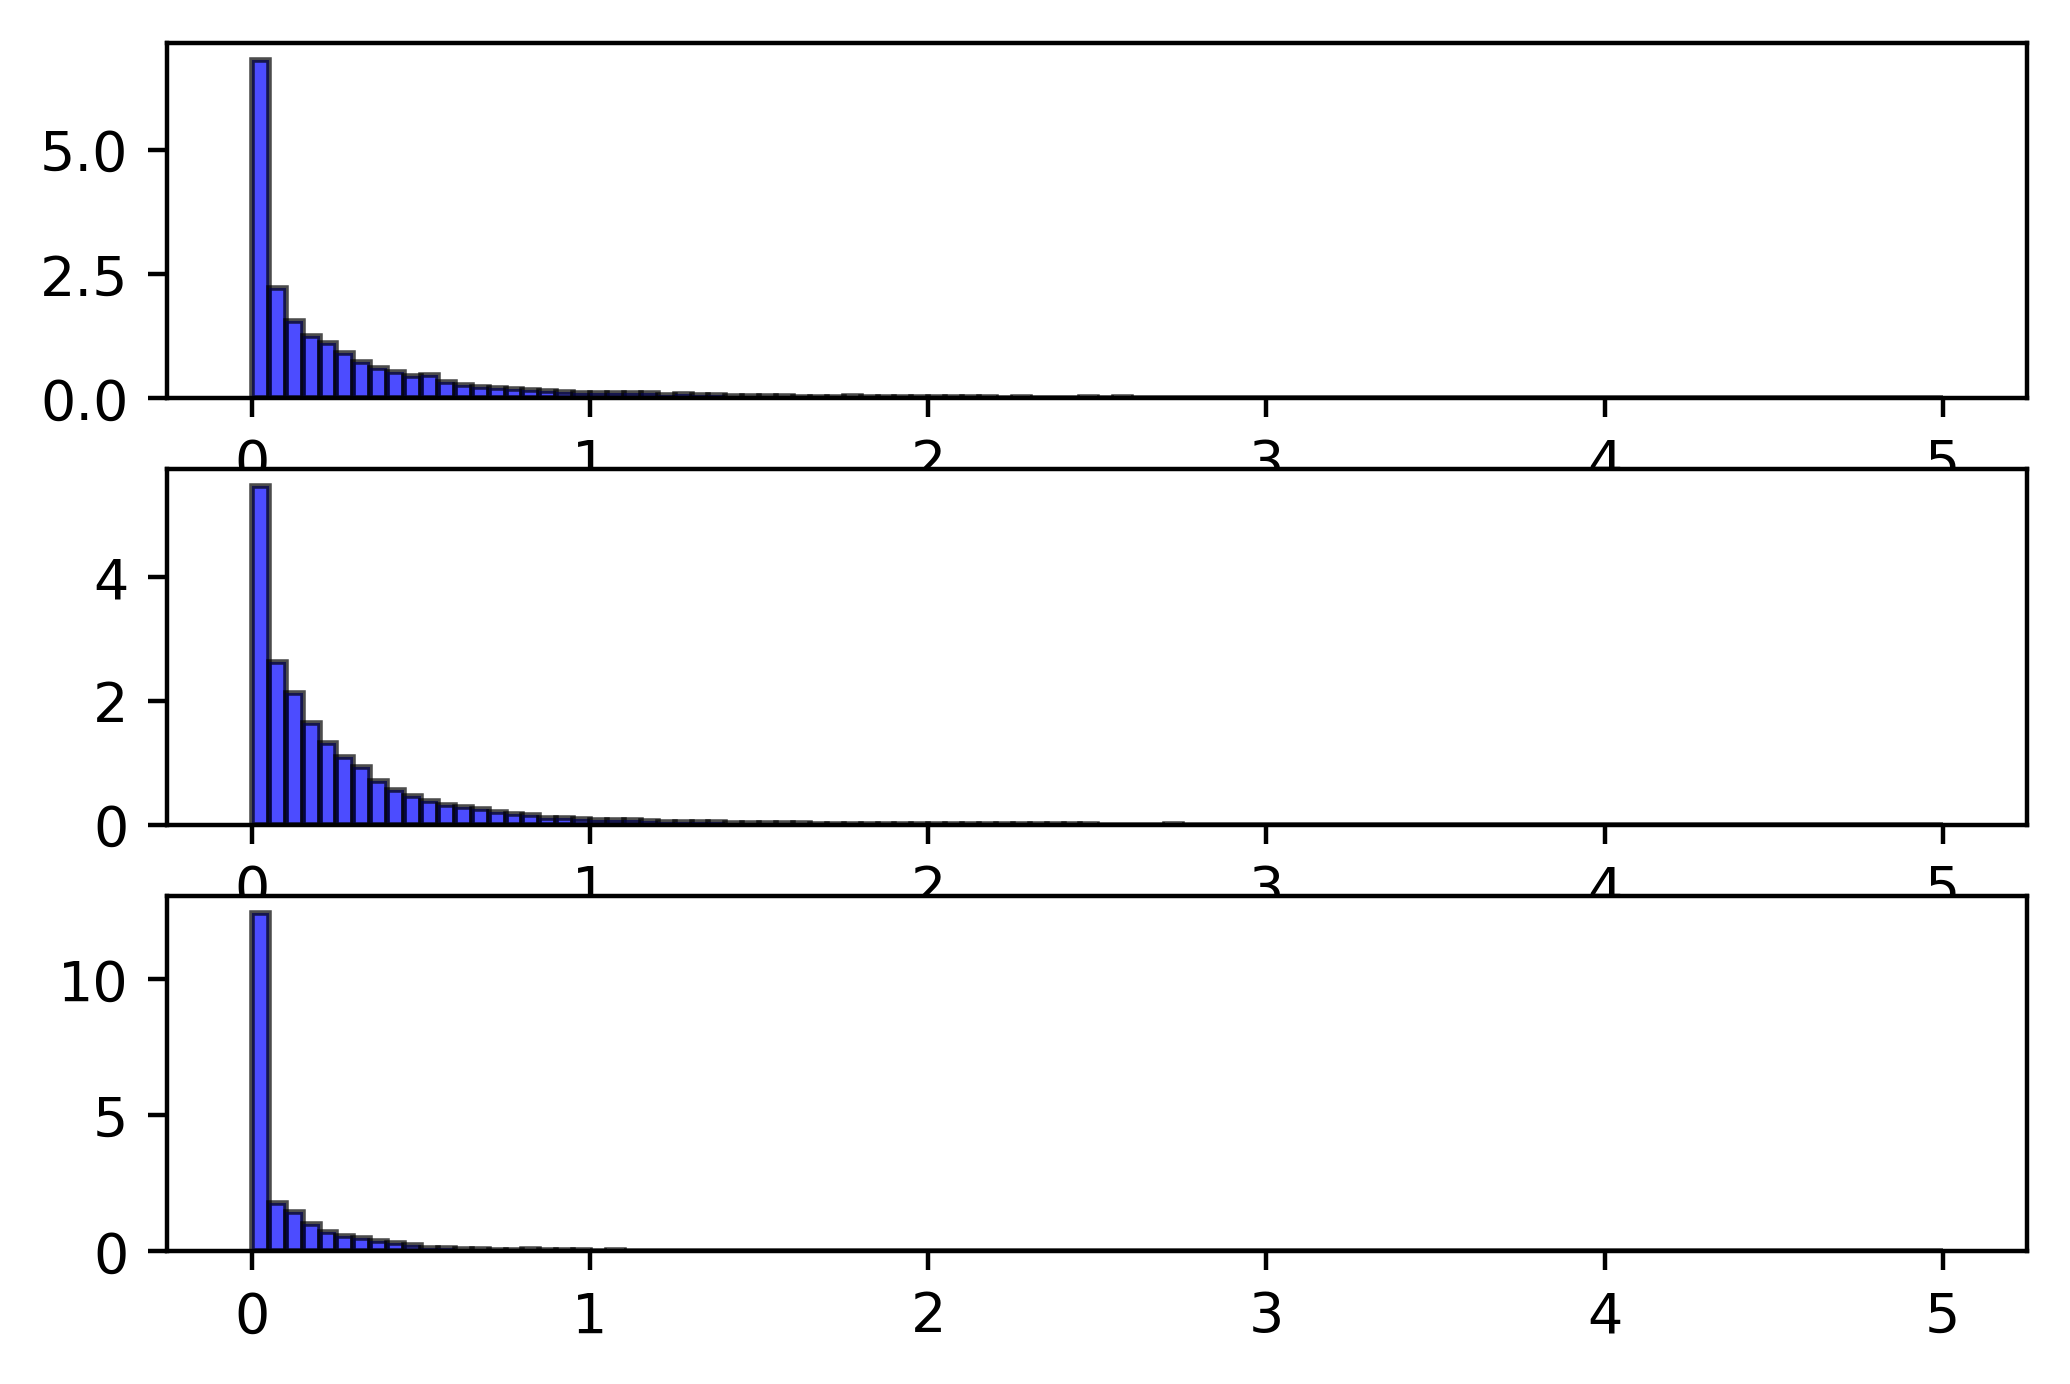

In [23]:
fig = plt.figure(dpi=400)
ax = fig.add_subplot(3,1,1)
ax.hist(train_wei['lon_lon_mean'], bins=100, range=(0,5),normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
bx = fig.add_subplot(3,1,2)
bx.hist(train_tuo['lon_lon_mean'], bins=100,range=(0,5),normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
cx = fig.add_subplot(3,1,3)
cx.hist(train_ci['lon_lon_mean'], bins=100, range=(0,5),normed=1, facecolor="blue", edgecolor="black", alpha=0.7)

(array([2.44803298e-02, 1.34108428e-02, 2.96063751e-02, 2.72788735e-02,
        3.14766890e-02, 2.45496007e-02, 2.47989759e-02, 3.16152307e-02,
        1.64158137e-01, 3.14198868e-01, 8.73644369e-02, 4.87985658e-01,
        2.88970413e-01, 1.36588326e-01, 1.63576262e-01, 5.52781642e-02,
        2.05041812e-01, 1.48378230e-01, 3.04653341e-02, 4.09390915e-02,
        4.38623227e-02, 4.71249813e-01, 2.25199639e-01, 6.71678184e-01,
        1.20074148e+00, 1.09378723e-01, 7.50203656e-02, 1.99500141e-02,
        2.14601194e-02, 2.06011604e-02, 3.42807743e-01, 9.26428781e-02,
        2.75947487e-01, 4.76860754e-02, 1.83013671e-02, 4.09806540e-02,
        3.69033699e-01, 3.36351697e-01, 8.50369352e-02, 1.27499986e-01,
        1.95288472e-01, 3.59515880e-02, 1.81420441e-01, 5.33385794e-03,
        6.01409801e-02, 4.33635724e-03, 4.46104483e-03, 6.28979612e-03,
        1.08478202e-02, 1.06261534e-02, 2.66000188e-03, 1.14989665e-03,
        2.39677253e-03, 1.43072081e-01, 1.97255765e-01, 4.659159

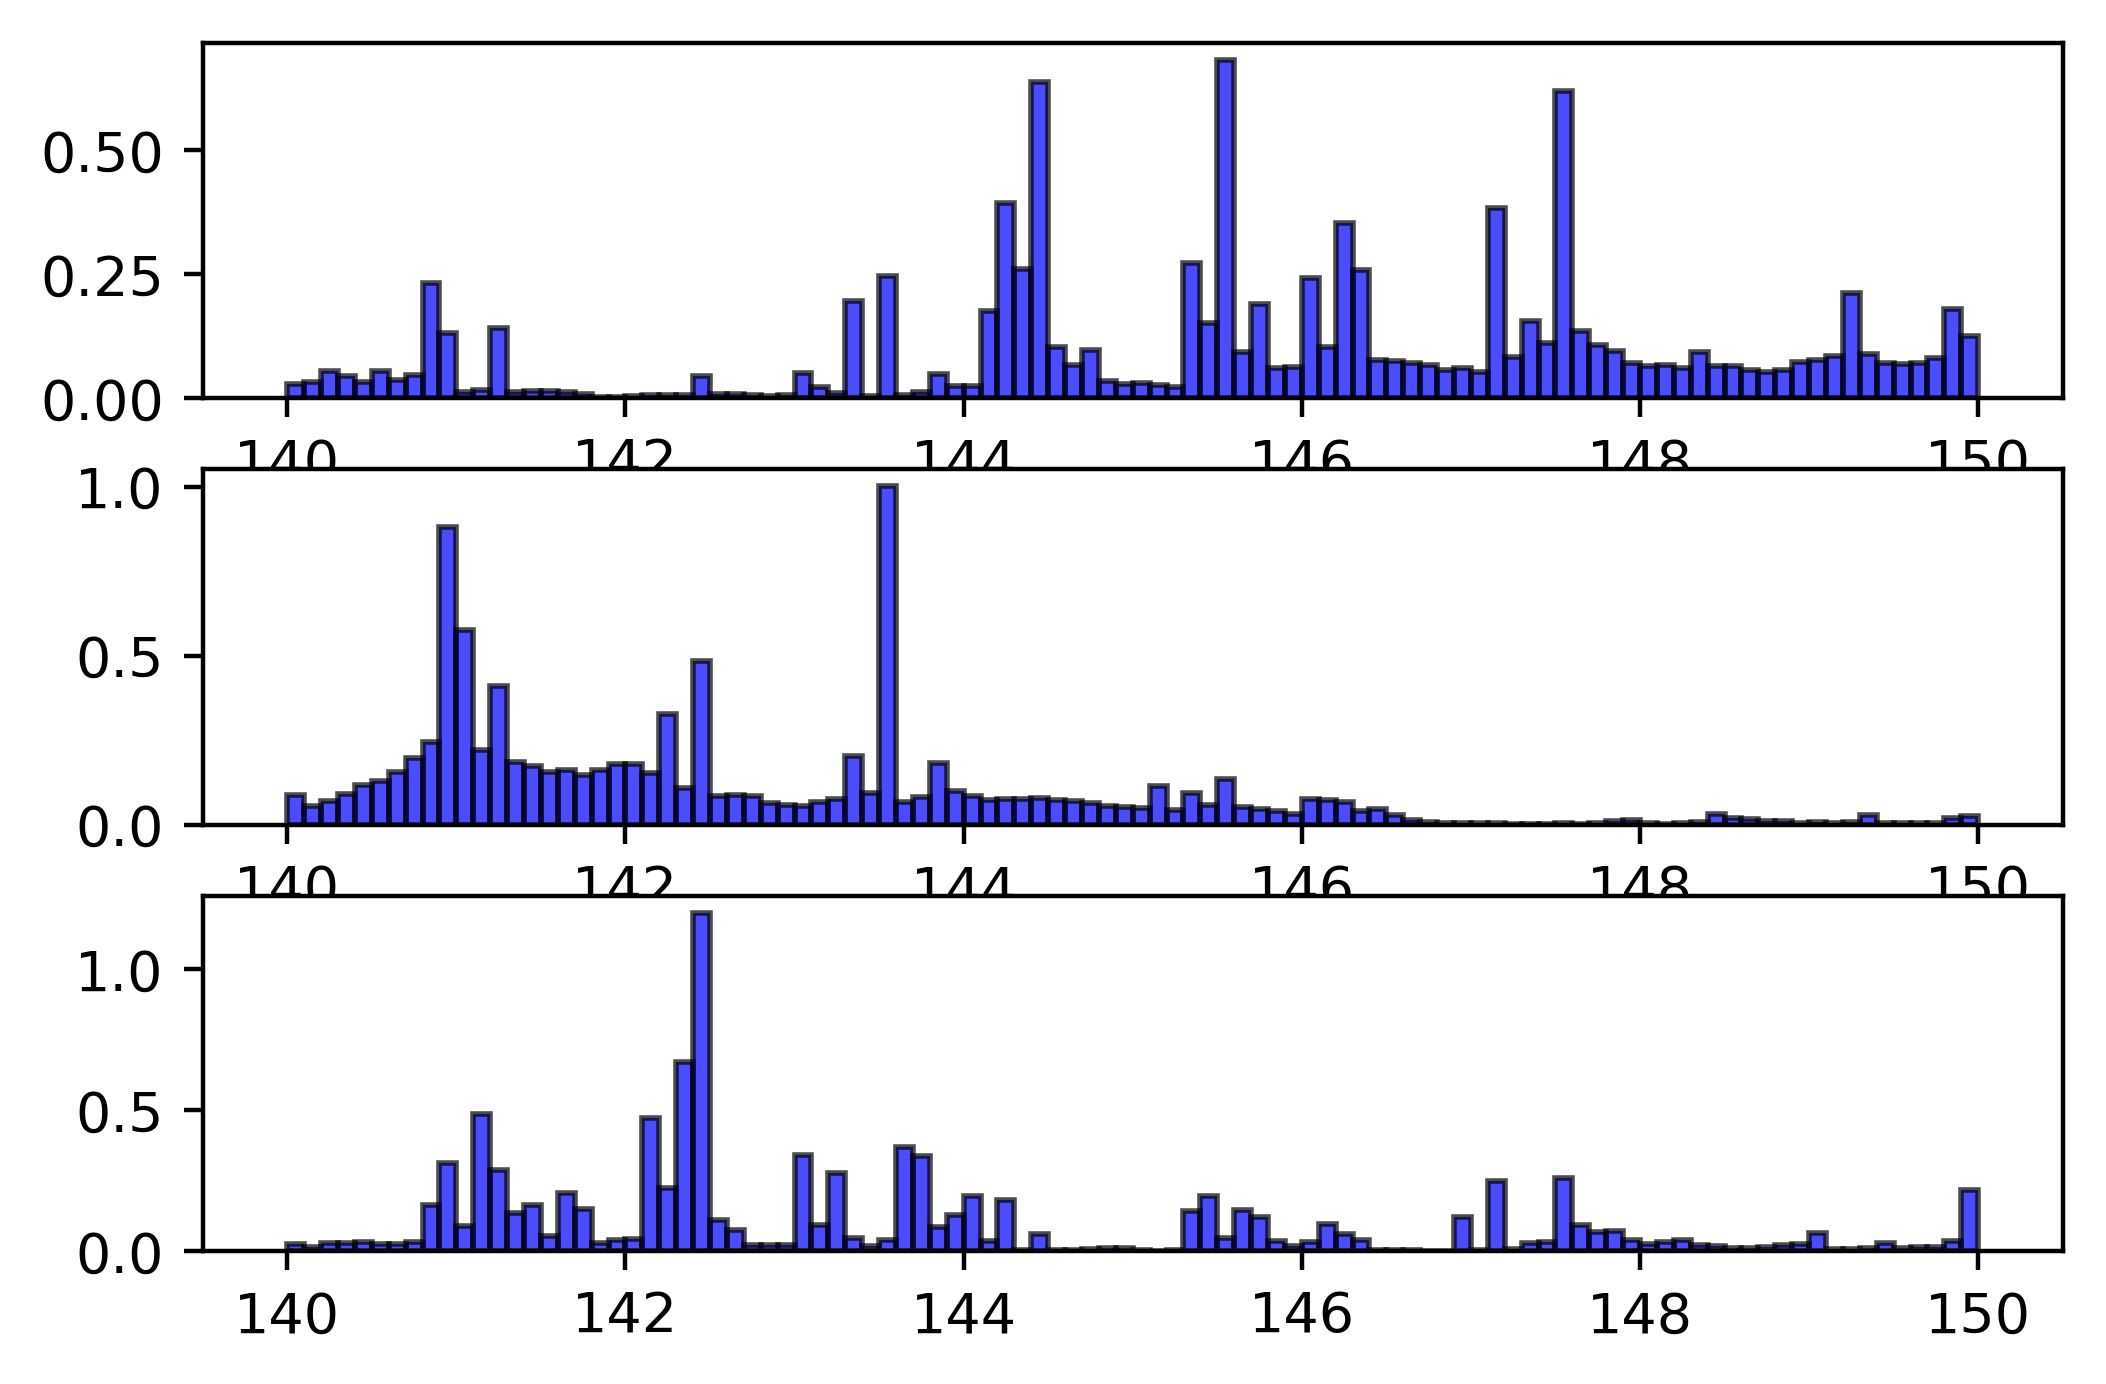

In [20]:
fig = plt.figure(dpi=400)
ax = fig.add_subplot(3,1,1)
ax.hist(train_wei['distance'], bins=100,range=(140, 150), normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
bx = fig.add_subplot(3,1,2)
bx.hist(train_tuo['distance'], bins=100, range=(140, 150), normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
cx = fig.add_subplot(3,1,3)
cx.hist(train_ci['distance'], bins=100,range=(140, 150),normed=1, facecolor="blue", edgecolor="black", alpha=0.7)

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.13355914e-03, 1.09248816e-03, 1.56891157e-03, 9.85703601e-04,
        4.84637604e-04, 3.37439200e-02, 1.83751580e-02, 0.00000000e+00,
        0.00000000e+00, 1.39641344e-04, 3.12139474e-04, 1.17134445e-02,
        3.05403832e-02, 3.28157157e-02, 3.98963533e-02, 7.98419917e-02,
        8.91815333e-02, 7.64084575e-02, 8.19941112e-02, 1.84556571e-01,
        4.27573580e-01, 3.24501840e-01, 2.17372287e-01, 3.50376559e-01,
        7.87577178e-01, 4.98388169e-01, 4.53563298e-01, 6.53028636e-02,
        5.07374500e-01, 1.24798290e-01, 1.50533368e-01, 7.71313068e-03,
        5.57826096e-02, 1.41128113e-01, 4.43320195e-02, 1.03852089e-01,
        1.45317353e-01, 4.56955761e-02, 4.69523482e-02, 2.45933049e-02,
        2.90043285e-02, 1.31895356e-01, 2.29356800e-01, 1.54385827e-01,
        9.37157699e-02, 2.49218727e-02, 3.46392674e-02, 1.42598454e-02,
        4.17691901e-02, 1.73565976e-02, 4.60405724e-02, 1.777634

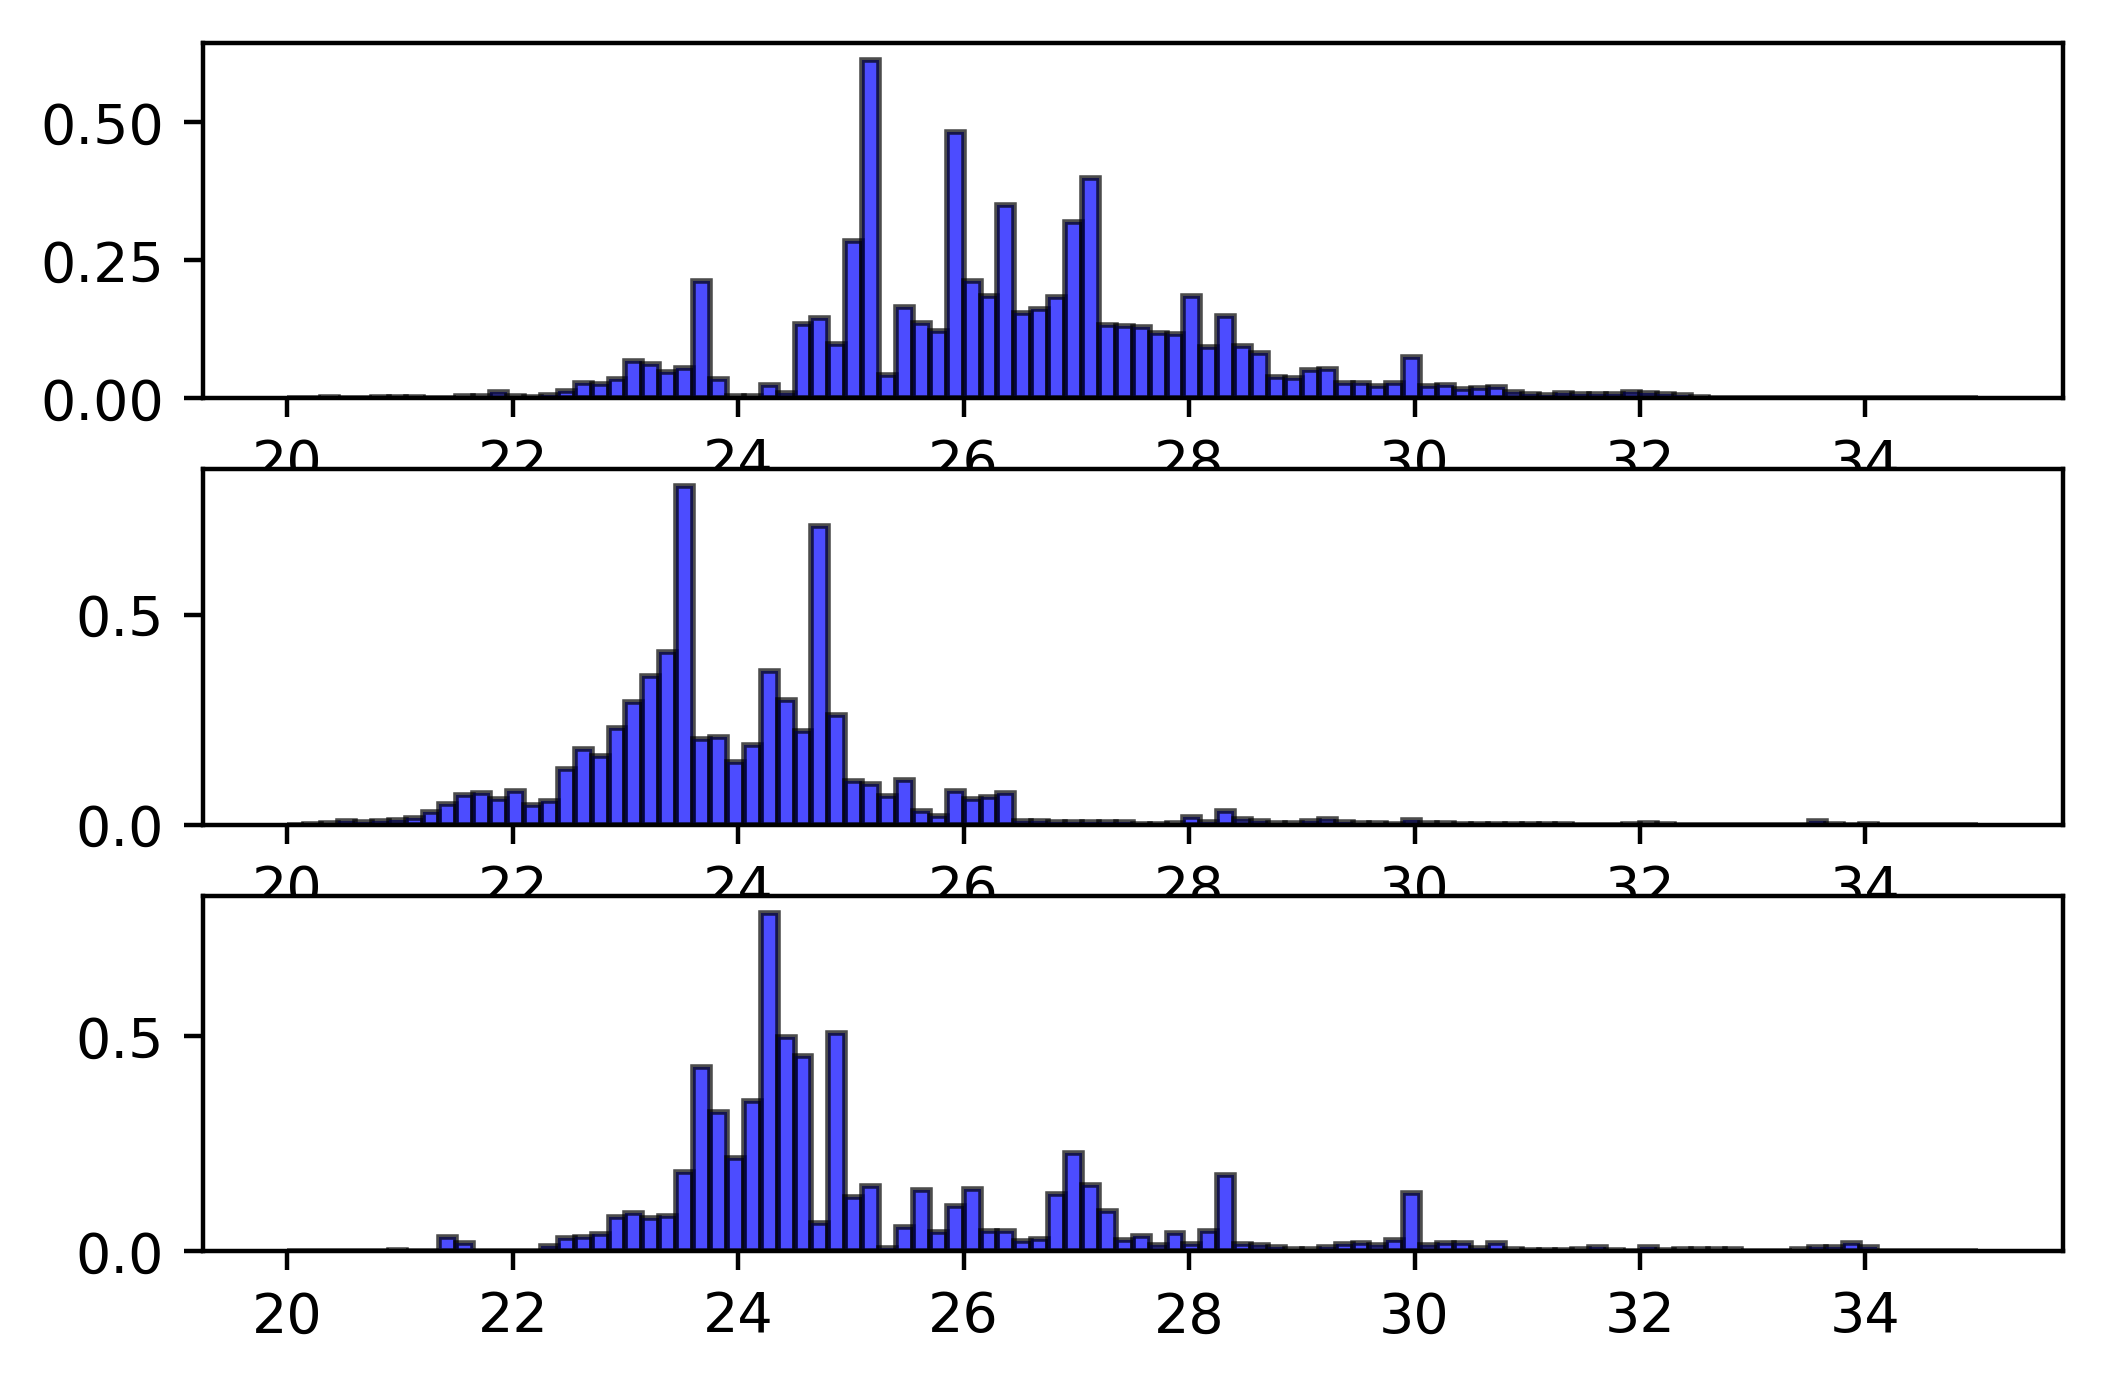

In [16]:
fig = plt.figure(dpi=400)
ax = fig.add_subplot(3,1,1)
ax.hist(train_wei['lat'], bins=100, range=(20,35), normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
bx = fig.add_subplot(3,1,2)
bx.hist(train_tuo['lat'], bins=100, range=(20,35),normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
cx = fig.add_subplot(3,1,3)
cx.hist(train_ci['lat'], bins=100, range=(20,35),normed=1, facecolor="blue", edgecolor="black", alpha=0.7)

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.14175965e-02, 1.36630019e-02, 4.55875298e-02, 2.89665584e-02,
        1.96286547e-02, 2.27854793e-02, 8.32871410e-02, 1.70418814e-01,
        4.09467491e-01, 1.76019899e-01, 3.49148113e-01, 7.46692584e-01,
        7.71698612e-01, 1.91224028e-01, 1.15824805e-01, 2.78090560e-01,
        2.14929212e-01, 4.29444142e-01, 2.55139368e-01, 1.55438397e-01,
        6.41473384e-02, 1.63475457e-02, 1.13612542e-01, 7.04692732e-02,
        2.49538283e-01, 7.03201318e-02, 2.88190742e-01, 8.45796990e-02,
        1.11831132e-01, 3.28690896e-02, 8.27817176e-02, 6.60281761e-02,
        6.31033491e-02, 5.61599922e-02, 4.79075059e-02, 4.87692113e-02,
        1.65845147e-01, 2.32743314e-02, 3.64484812e-02, 4.82969304e-02,
        1.33108627e-01, 3.66224794e-02, 3.52884932e-02, 4.72777981e-02,
        5.87782509e-02, 4.32095543e-02, 3.57276315e-02, 1.207216

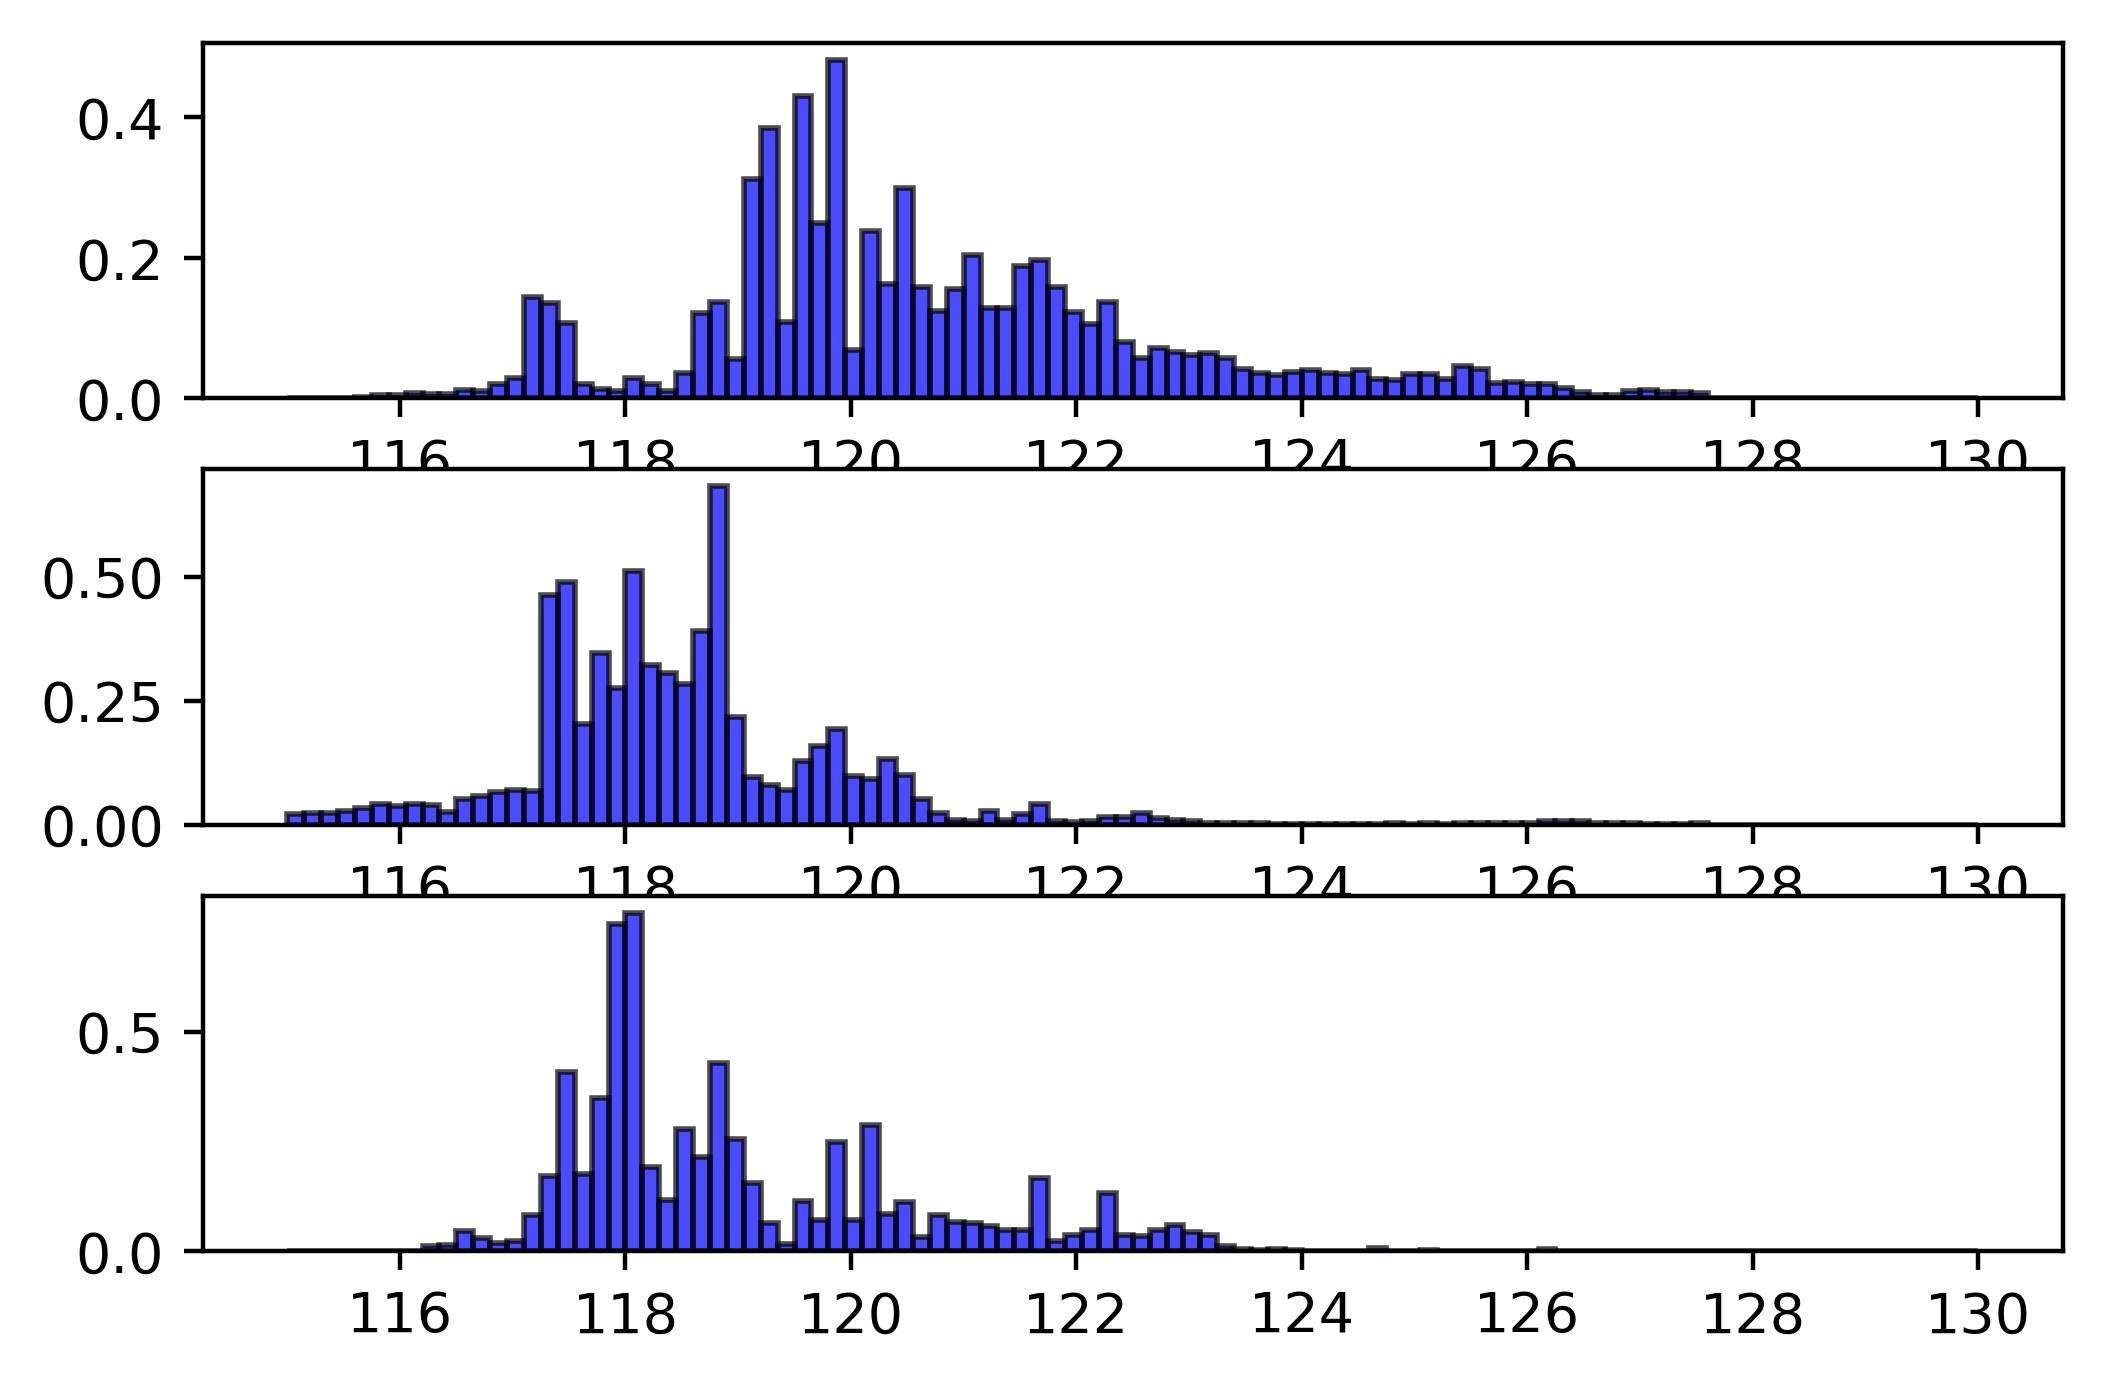

In [9]:
fig = plt.figure(dpi=400)
ax = fig.add_subplot(3,1,1)
ax.hist(train_wei['lon'], bins=100, range=(115, 130), density=1, facecolor="blue", edgecolor="black", alpha=0.7)
bx = fig.add_subplot(3,1,2)
bx.hist(train_tuo['lon'], bins=100, range=(115, 130), density=1, facecolor="blue", edgecolor="black", alpha=0.7)
cx = fig.add_subplot(3,1,3)
cx.hist(train_ci['lon'], bins=100, range=(115, 130), density=1, facecolor="blue", edgecolor="black", alpha=0.7)

(array([1.34554392e+00, 1.87126446e-01, 1.93753841e-01, 1.23959088e-01,
        1.57961035e-01, 1.28685980e-01, 7.43998181e-02, 7.62272248e-02,
        9.82901150e-02, 8.07591934e-02, 7.85175745e-02, 1.08730699e-01,
        1.61189454e-01, 1.08889074e-01, 1.39638237e-01, 7.27429694e-02,
        8.70089243e-02, 4.13846704e-02, 3.99349278e-02, 4.01907647e-02,
        3.27471281e-02, 3.64872204e-02, 2.61684639e-02, 3.60486428e-02,
        2.40974030e-02, 3.93014268e-02, 3.31735230e-02, 4.23836527e-02,
        4.20790849e-02, 3.61217391e-02, 4.57217156e-02, 5.13744937e-02,
        3.14313952e-02, 4.47836469e-02, 2.66070416e-02, 3.81440692e-02,
        2.18436014e-02, 2.03329452e-02, 1.92243185e-02, 5.03024151e-02,
        1.57156976e-03, 9.13703350e-04, 9.01520639e-04, 2.43654227e-04,
        3.16750495e-04, 2.31471515e-04, 1.21827113e-05, 4.87308453e-05,
        1.21827113e-05, 2.43654227e-05, 1.21827113e-05, 1.21827113e-05,
        2.43654227e-05, 0.00000000e+00, 1.21827113e-05, 0.000000

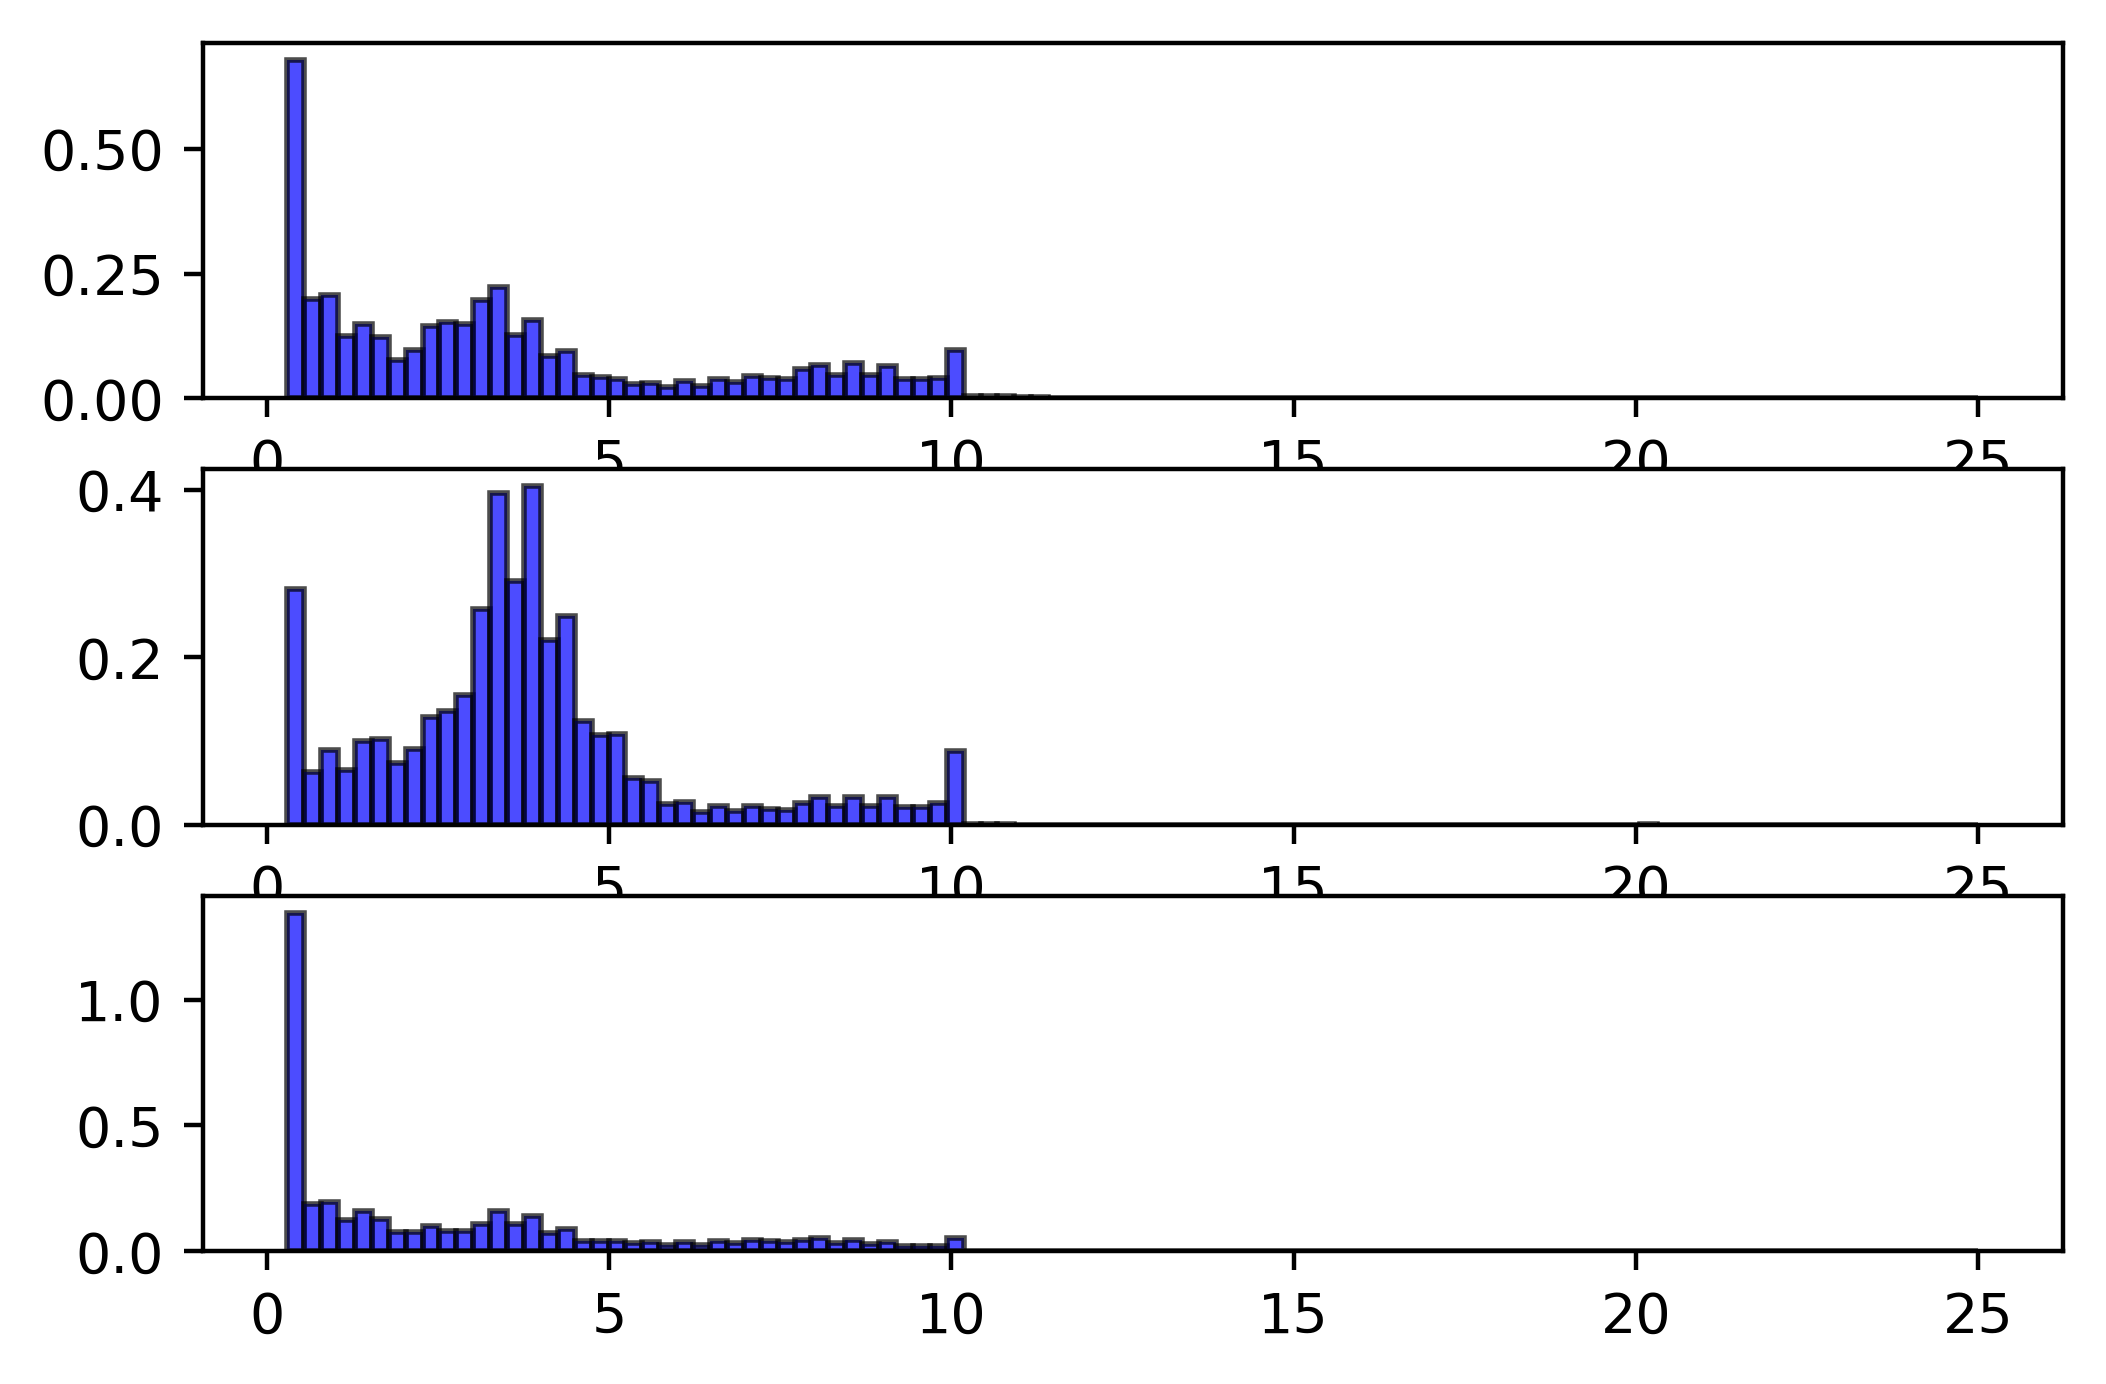

In [23]:
fig = plt.figure(dpi=400)
ax = fig.add_subplot(3,1,1)
ax.hist(train_wei['v'], bins=100, range=(0.3,25), normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
bx = fig.add_subplot(3,1,2)
bx.hist(train_tuo['v'], bins=100, range=(0.3,25), normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
cx = fig.add_subplot(3,1,3)
cx.hist(train_ci['v'], bins=100, range=(0.3,25), normed=1, facecolor="blue", edgecolor="black", alpha=0.7)

(array([0.06006879, 0.00385895, 0.00028576, 0.00265963, 0.00024379,
        0.00278593, 0.00286863, 0.00025956, 0.0028109 , 0.00024789,
        0.00279371, 0.00285102, 0.00038729, 0.00326533, 0.00072627,
        0.00363133, 0.00104088, 0.00218432, 0.00215567, 0.00207379,
        0.00204677, 0.00196243, 0.00188342, 0.00179663, 0.00170288,
        0.00166173, 0.00156839, 0.00155508, 0.00158927, 0.0018173 ,
        0.00191658, 0.00166685, 0.00154198, 0.00150145, 0.0015295 ,
        0.00157289, 0.00161301, 0.00165088, 0.00158784, 0.00152561,
        0.00147791, 0.00146829, 0.00153871, 0.00165211, 0.0018652 ,
        0.00194954, 0.00178087, 0.00170963, 0.00167135, 0.0016994 ,
        0.00171168, 0.00175344, 0.0017561 , 0.00173993, 0.00172109,
        0.0016996 , 0.00164945, 0.00163881, 0.00169919, 0.00359448]),
 array([  0.,   6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.,
         66.,  72.,  78.,  84.,  90.,  96., 102., 108., 114., 120., 126.,
        132., 138., 144., 150., 15

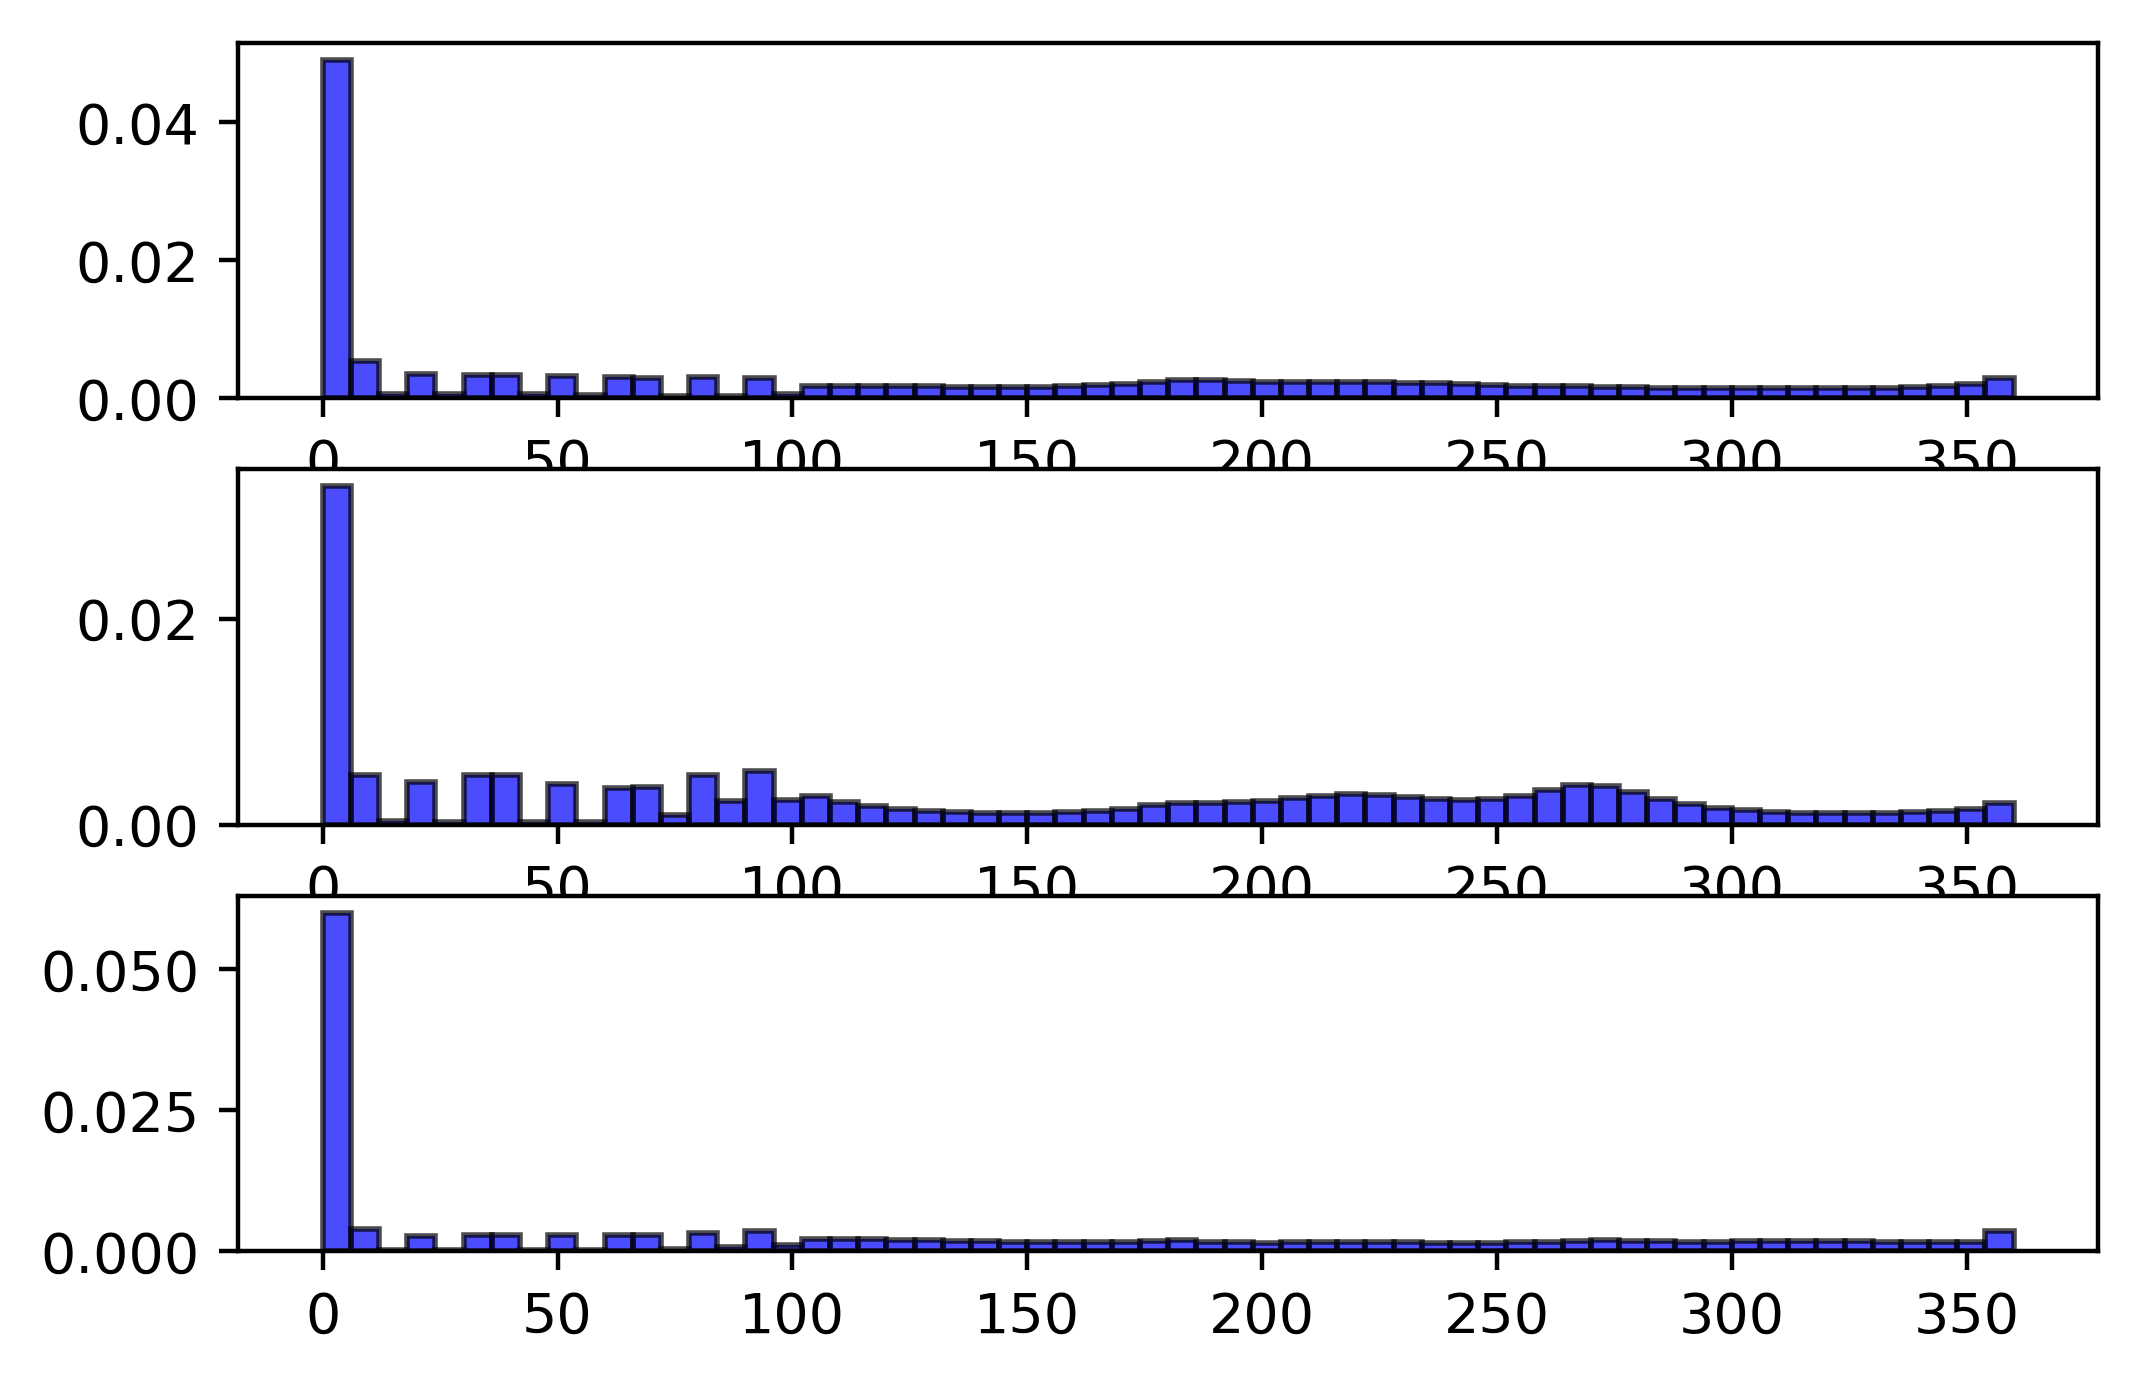

In [24]:
fig = plt.figure(dpi=400)
ax = fig.add_subplot(3,1,1)
ax.hist(train_wei['d'], bins=60, normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
bx = fig.add_subplot(3,1,2)
bx.hist(train_tuo['d'], bins=60, normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
cx = fig.add_subplot(3,1,3)
cx.hist(train_ci['d'], bins=60, normed=1, facecolor="blue", edgecolor="black", alpha=0.7)

拖网


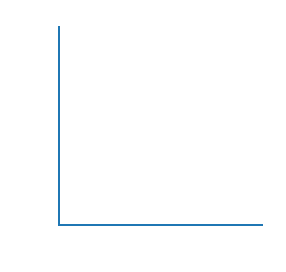

In [5]:
# tuo
test = df[df['ship'] == 27633]
plt.figure(figsize=(4, 4))
plt.plot(test['lat'].values, test['lon'].values)
plt.axis('off')
print(test['type'].iloc[0])

拖网


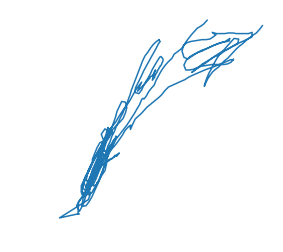

In [36]:
# tuo
test = df[df['ship'] == 20000]
plt.figure(figsize=(4, 4))
plt.plot(test['lat'].values, test['lon'].values)
plt.axis('off')
print(test['type'].iloc[0])

拖网


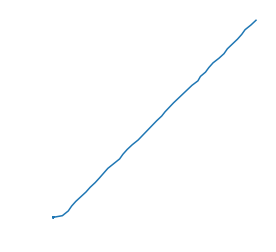

In [37]:
# tuo
test = df[df['ship'] == 20012]
plt.figure(figsize=(4, 4))
plt.plot(test['lat'].values, test['lon'].values)
plt.axis('off')
print(test['type'].iloc[0])

拖网


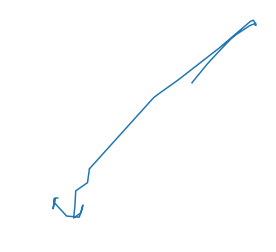

In [47]:
# tuo
test = df[df['ship'] == 20252]
plt.figure(figsize=(4, 4))
plt.plot(test['lat'].values, test['lon'].values)
plt.axis('off')
print(test['type'].iloc[0])

拖网


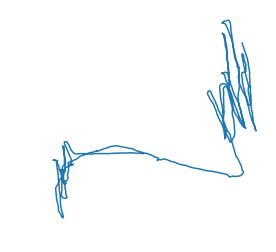

In [38]:
# tuo
test = df[df['ship'] == 20077]
plt.figure(figsize=(4, 4))
plt.plot(test['lat'].values, test['lon'].values)
plt.axis('off')
print(test['type'].iloc[0])

拖网


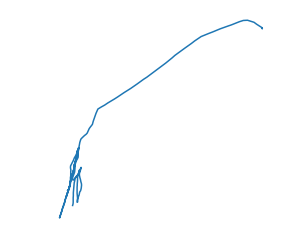

In [49]:
# tuo
test = df[df['ship'] == 20256]
plt.figure(figsize=(4, 4))
plt.plot(test['lat'].values, test['lon'].values)
plt.axis('off')
print(test['type'].iloc[0])

围网


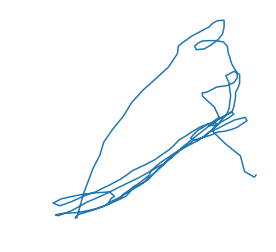

In [39]:
# wei
test = df[df['ship'] == 20008]
plt.figure(figsize=(4, 4))
plt.plot(test['lat'].values, test['lon'].values)
plt.axis('off')
print(test['type'].iloc[0])

围网


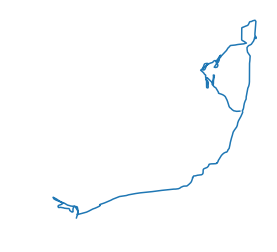

In [41]:
# wei
test = df[df['ship'] == 20053]
plt.figure(figsize=(4, 4))
plt.plot(test['lat'].values, test['lon'].values)
plt.axis('off')
print(test['type'].iloc[0])

围网


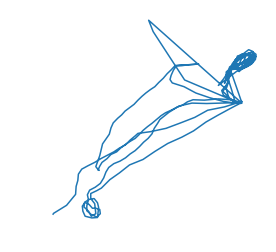

In [42]:
# wei
test = df[df['ship'] == 20068]
plt.figure(figsize=(4, 4))
plt.plot(test['lat'].values, test['lon'].values)
plt.axis('off')
print(test['type'].iloc[0])

围网


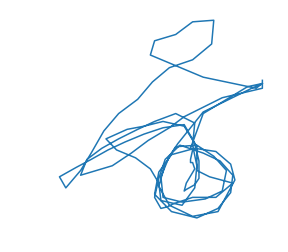

In [43]:
# wei
test = df[df['ship'] == 20195]
plt.figure(figsize=(4, 4))
plt.plot(test['lat'].values, test['lon'].values)
plt.axis('off')
print(test['type'].iloc[0])

围网


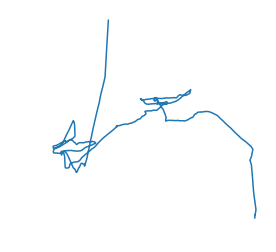

In [44]:
# wei
test = df[df['ship'] == 20196]
plt.figure(figsize=(4, 4))
plt.plot(test['lat'].values, test['lon'].values)
plt.axis('off')
print(test['type'].iloc[0])

围网


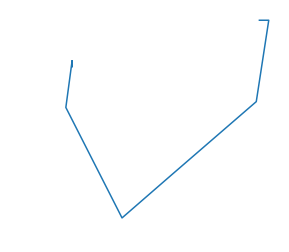

In [45]:
# wei
test = df[df['ship'] == 20197]
plt.figure(figsize=(4, 4))
plt.plot(test['lat'].values, test['lon'].values)
plt.axis('off')
print(test['type'].iloc[0])

刺网


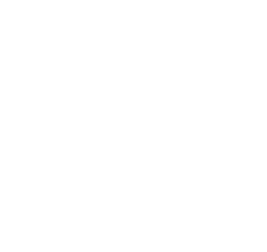

In [40]:
# ci
test = df[df['ship'] == 20010]
plt.figure(figsize=(4, 4))
plt.plot(test['lat'].values, test['lon'].values)
plt.axis('off')
print(test['type'].iloc[0])

刺网


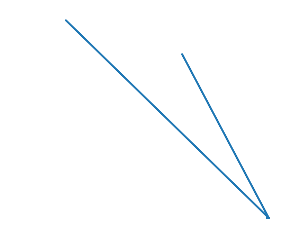

In [46]:
# ci
test = df[df['ship'] == 20240]
plt.figure(figsize=(4, 4))
plt.plot(test['lat'].values, test['lon'].values)
plt.axis('off')
print(test['type'].iloc[0])

刺网


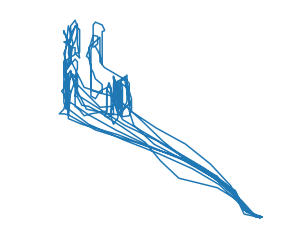

In [48]:
# ci
test = df[df['ship'] == 20255]
plt.figure(figsize=(4, 4))
plt.plot(test['lat'].values, test['lon'].values)
plt.axis('off')
print(test['type'].iloc[0])

刺网


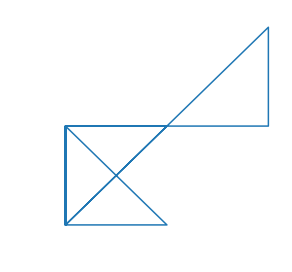

In [50]:
# ci
test = df[df['ship'] == 20914]
plt.figure(figsize=(4, 4))
plt.plot(test['lat'].values, test['lon'].values)
plt.axis('off')
print(test['type'].iloc[0])

围网


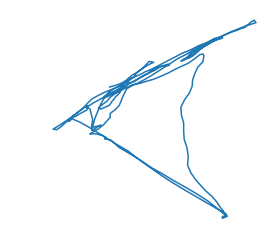

In [6]:
test = df[df['ship'] == 20001]
plt.figure(figsize=(4, 4))
plt.plot(test['lat'].values, test['lon'].values)
plt.axis('off')
print(test['type'].iloc[0])

<Figure size 432x288 with 0 Axes>

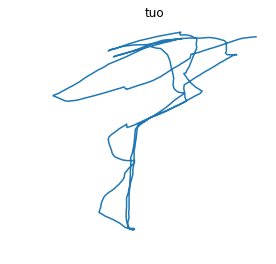

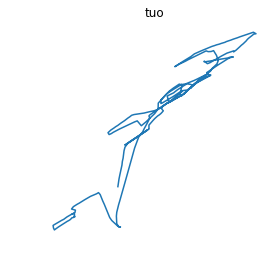

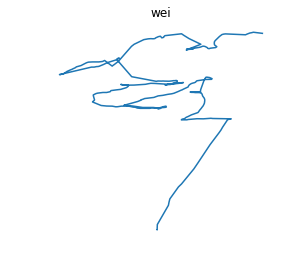

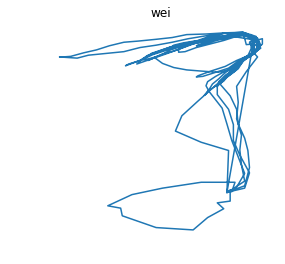

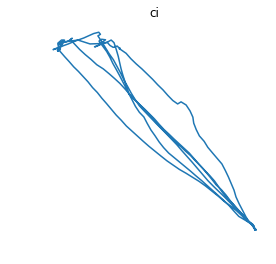

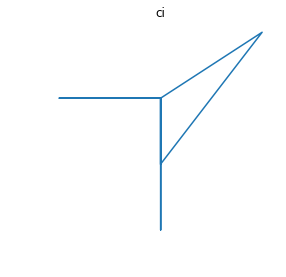

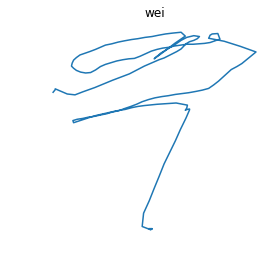

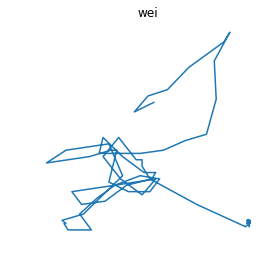

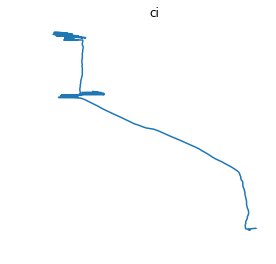

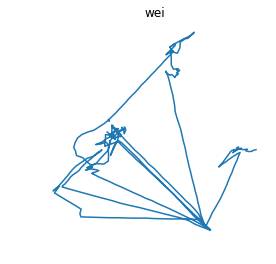

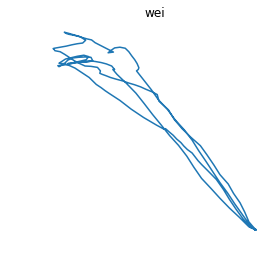

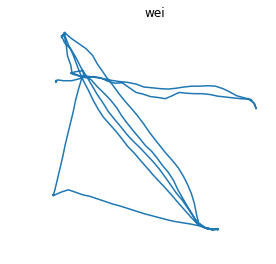

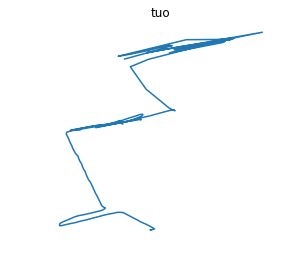

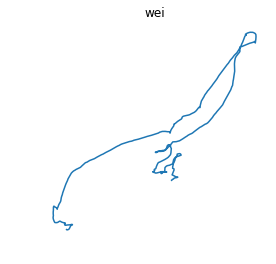

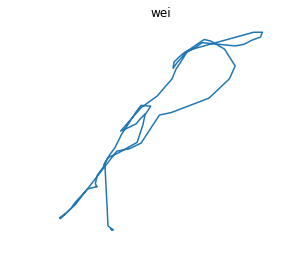

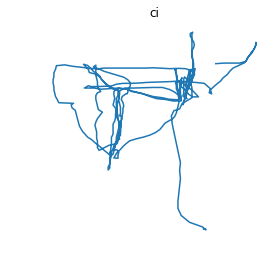

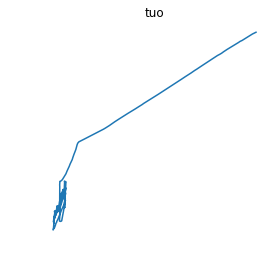

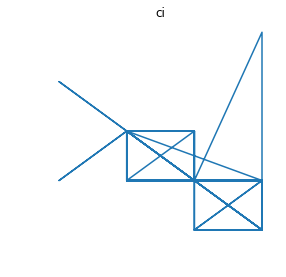

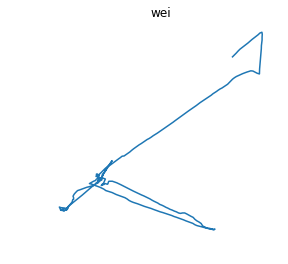

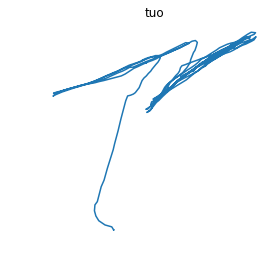

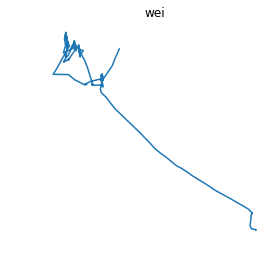

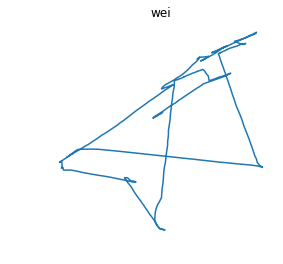

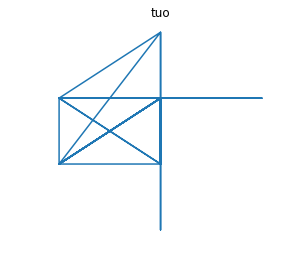

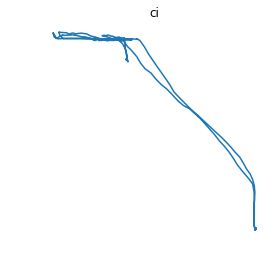

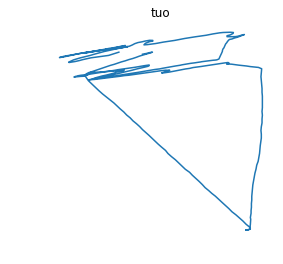

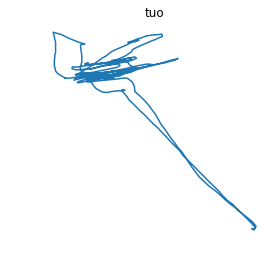

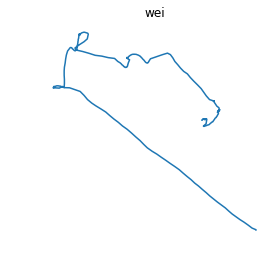

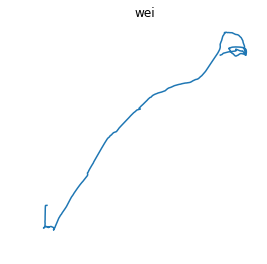

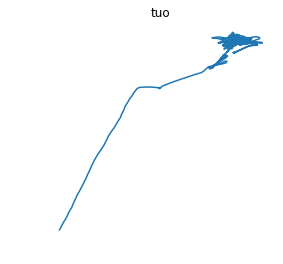

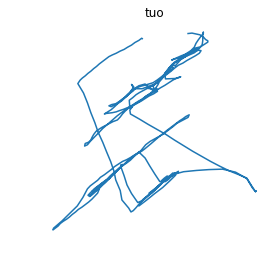

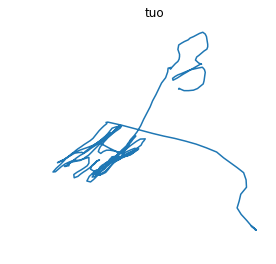

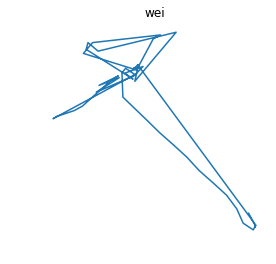

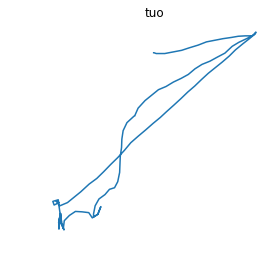

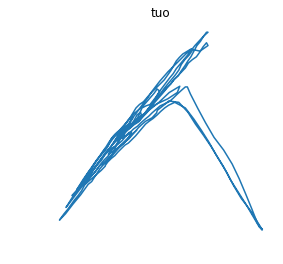

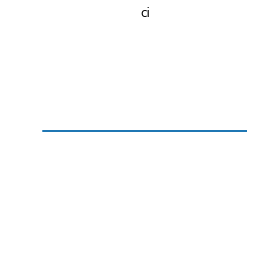

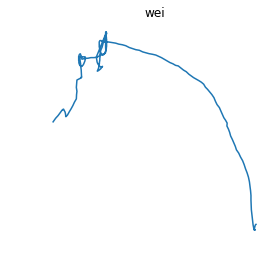

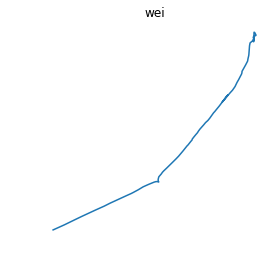

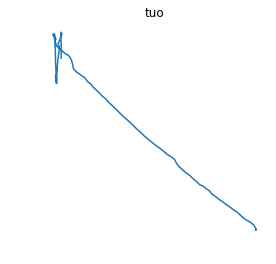

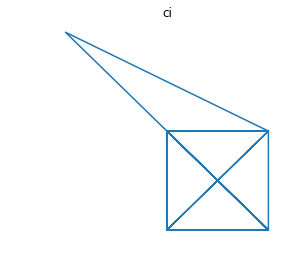

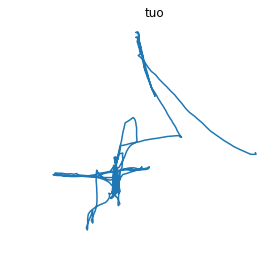

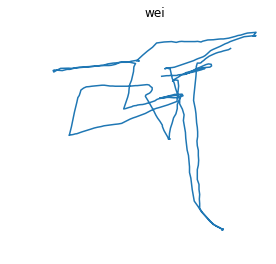

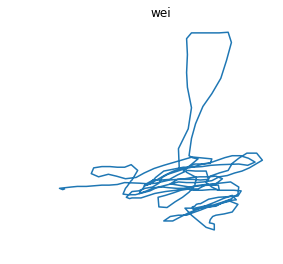

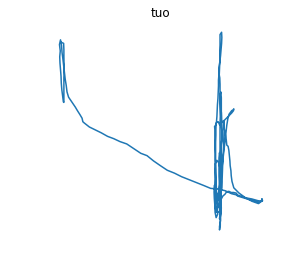

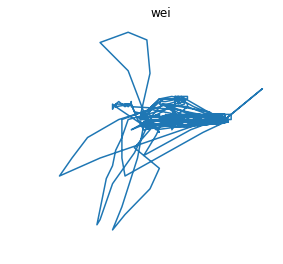

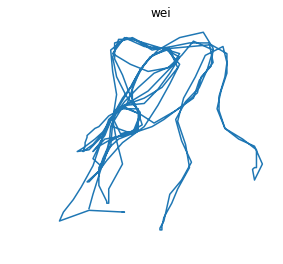

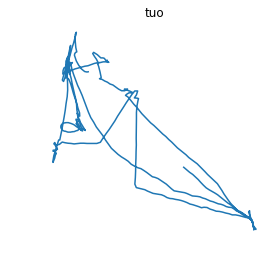

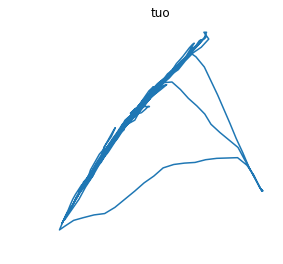

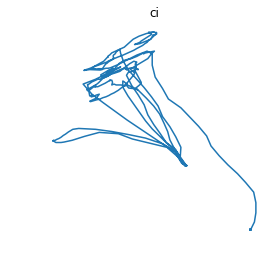

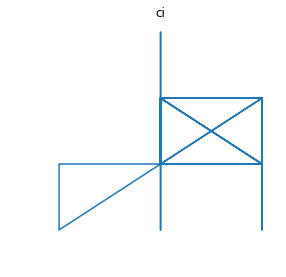

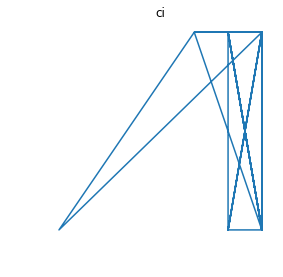

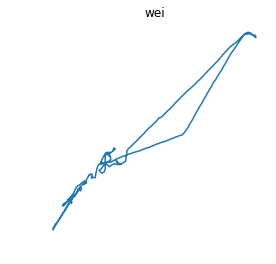

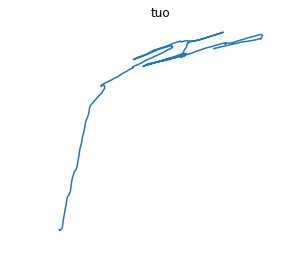

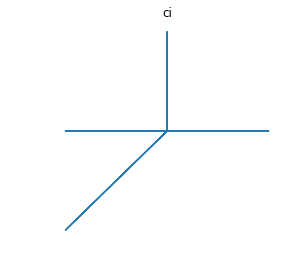

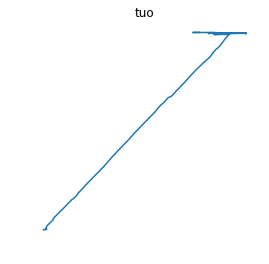

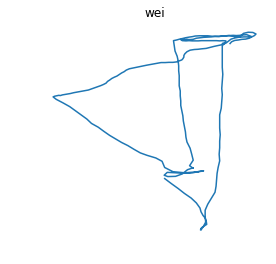

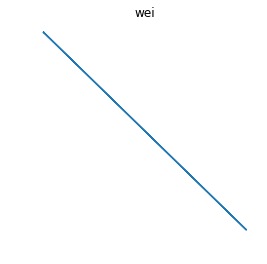

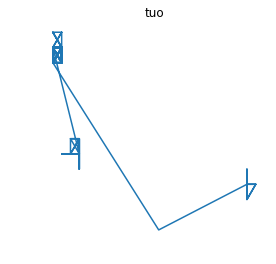

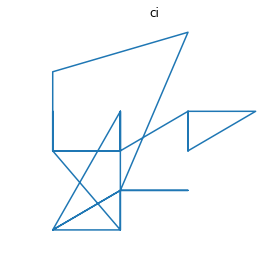

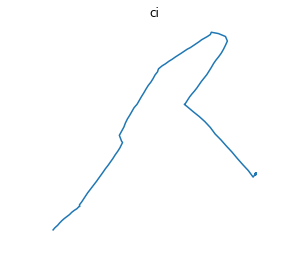

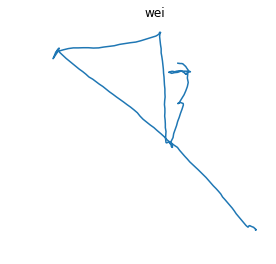

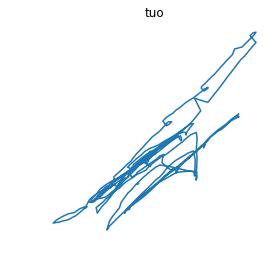

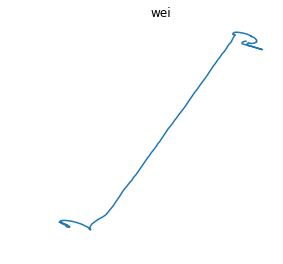

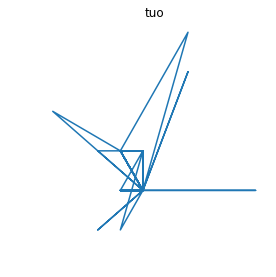

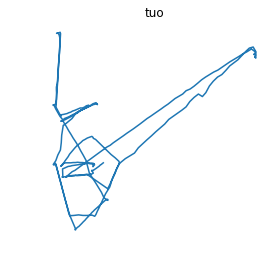

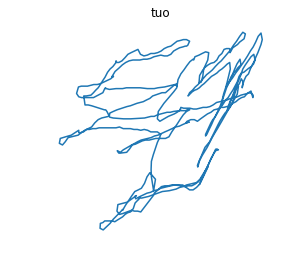

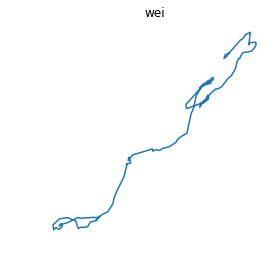

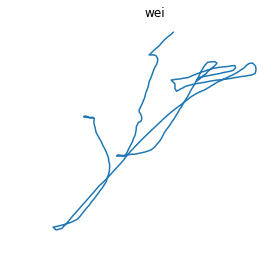

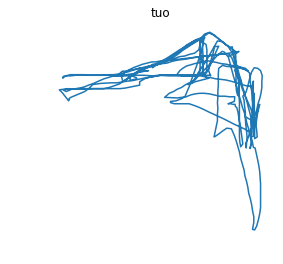

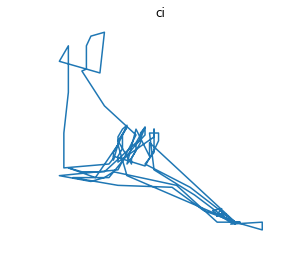

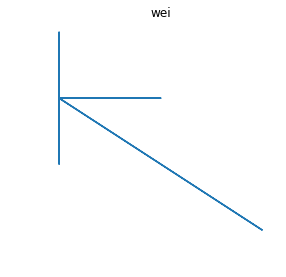

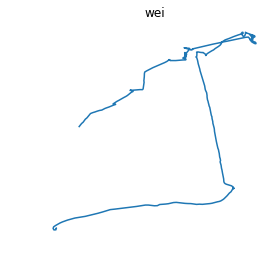

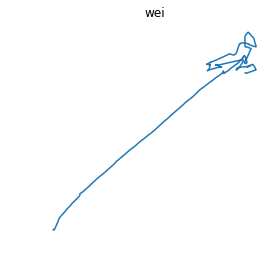

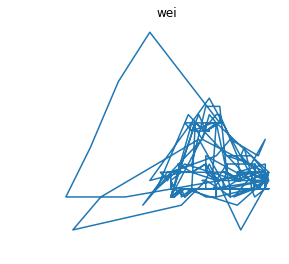

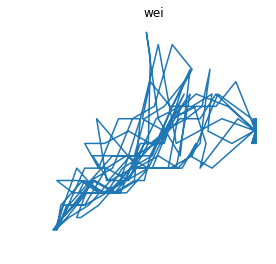

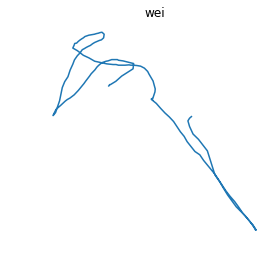

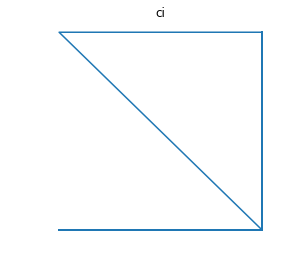

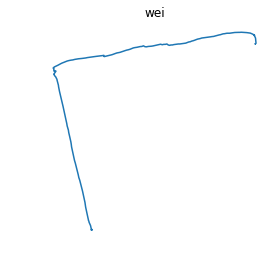

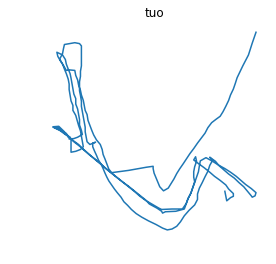

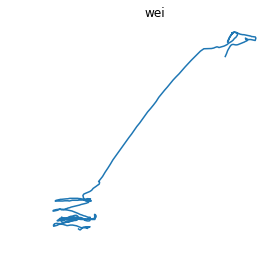

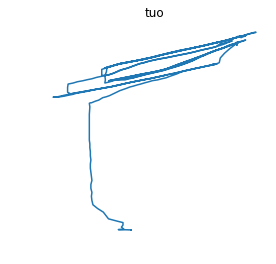

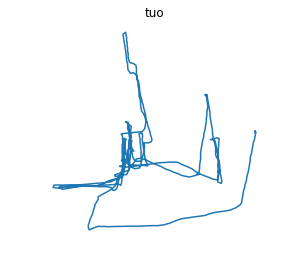

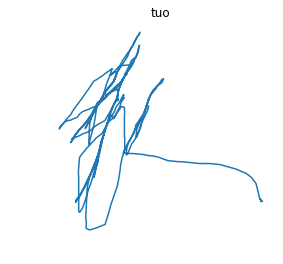

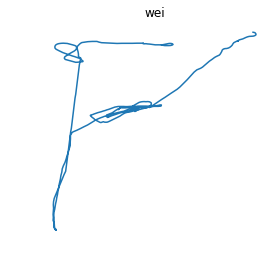

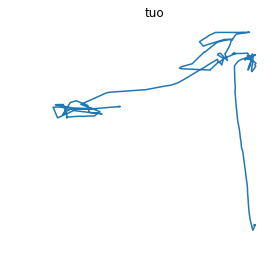

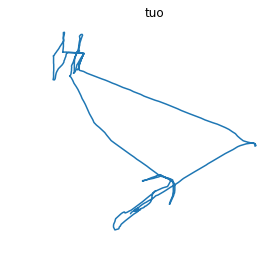

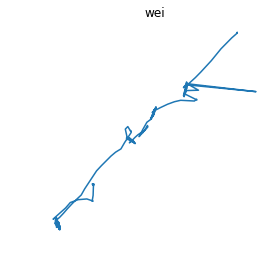

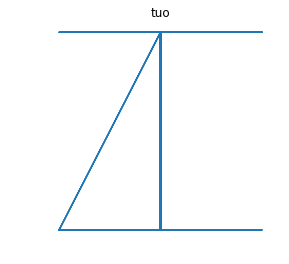

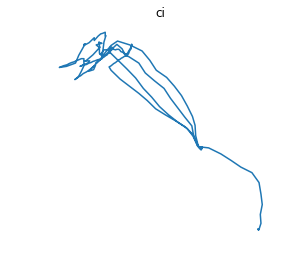

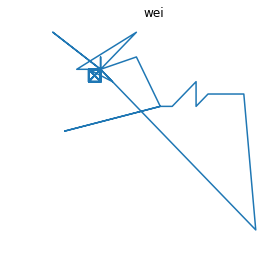

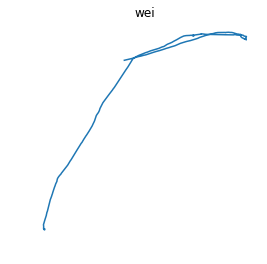

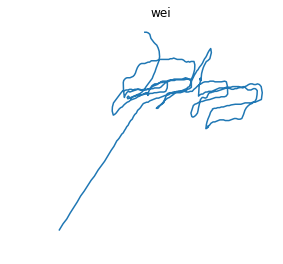

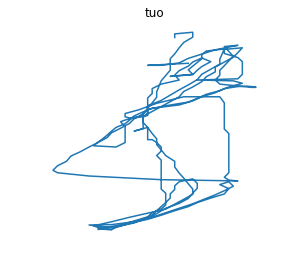

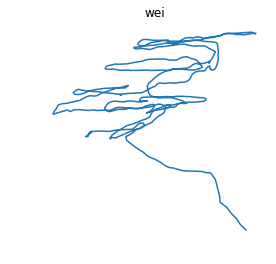

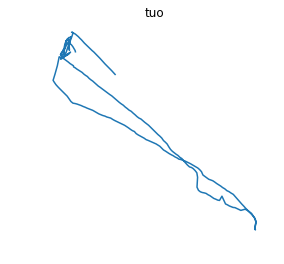

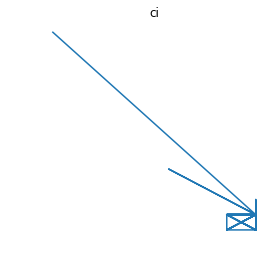

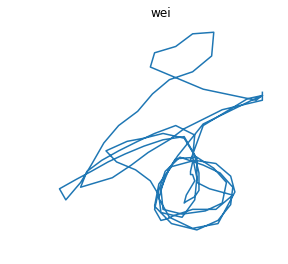

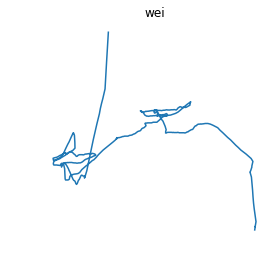

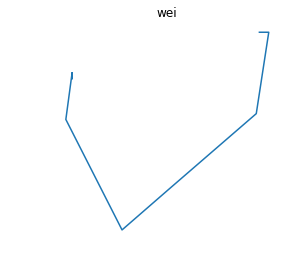

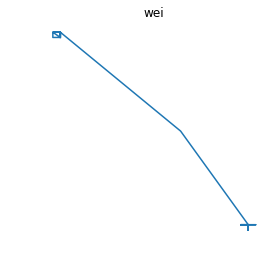

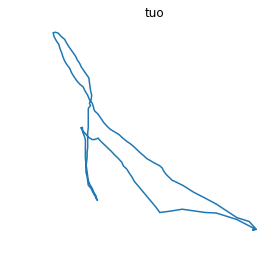

In [10]:
for i in range(20100, 20200):
    plt.figure(i - 20000)
    test = df[df['ship'] == i]
    plt.figure(figsize=(4, 4))
    plt.plot(test['lat'].values, test['lon'].values)
    plt.axis('off')
    if test['type'].iloc[0] == '围网':
        plt.title('wei')
    elif test['type'].iloc[0] == '拖网':
        plt.title('tuo')
    elif test['type'].iloc[0] == '刺网':
        plt.title('ci')